# *Pre-processing Data*

## Data Store

### Read Data

In [1]:
import pandas as pd

df = pd.read_excel("C:/Users/Shabrina/Storage/University/Semester 6/Data Challenge/Mitra UAS/Data_Store_clean.xlsx")

### Filter Data untuk Kategori Skincare

In [2]:
df = df[df['Category'] == 'SKINCARE']

### Manufaktur dengan Unit Penjualan Terbanyak

In [3]:
top_10_manufaktur = df.groupby('Manufacturer')['UnitSold'].sum().nlargest(10)
top_10_manufaktur

# Masking nama manufaktur
masked_names = {name: f"Manufacturer {chr(65+i)}" for i, name in enumerate(top_10_manufaktur.index)}

# Terapkan masking
top_10_manufaktur_masked = top_10_manufaktur.rename(index=masked_names)

# Tampilkan hasil
top_10_manufaktur_masked


Manufacturer
Manufacturer A    24433
Manufacturer B    19418
Manufacturer C    18959
Manufacturer D     8997
Manufacturer E     7375
Manufacturer F     6094
Manufacturer G     4058
Manufacturer H     3673
Manufacturer I     3146
Manufacturer J     3055
Name: UnitSold, dtype: int64

Berdasarkan hasil tersebut, dipilih manufaktur A karena menjadi perhatian utama objek penelitian. Selain itu, B (kompetitor) dipilih karena penjualan kedua manufaktur tersebut mendekati unit penjualan A.

### Filter Data untuk Manufaktur A dan B


In [ ]:
selected_manufacturers = ['A', 'B']
df = df[df['Manufacturer'].isin(selected_manufacturers)]

### Ambil Data untuk Bulan September dan Oktober

In [ ]:
# Pastikan kolom 'TrxDate' sudah dalam format datetime
df['TrxDate'] = pd.to_datetime(df['TrxDate'])

# Filter untuk data di bulan September dan Oktober
sepoct_df = df[df['TrxDate'].dt.month.isin([9, 10])].copy()

# Tambahkan kolom tanggal (tanpa tahun dan bulan)
sepoct_df['Tanggal'] = sepoct_df['TrxDate'].dt.day

### Buat Peubah Day

Peubah Day menunjukkan jenis hari pada tanggal transaksi yang berupa kategori weekdays atau weekend.
*   Kode 0: weekdays
*   Kode 1: weekend



In [ ]:
# Tambahkan kolom untuk weekend: 1 untuk Sabtu/Minggu, 0 untuk weekdays
sepoct_df['Day'] = sepoct_df['TrxDate'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

### Peubah Toko

Peubah toko dibentuk dari `StoreID` menjadi peubah `Toko1` sampai `Toko6` yang menunjukkan ada tidaknya unit yang terjual dari toko tersebut pada tanggal transaksi hari itu.

In [7]:
for i in range(1, 7):
  store_id = f"PC0{i}"
  sepoct_df[store_id] = (sepoct_df['StoreID'] == store_id).astype(int)

### Agregat Data

Data diagregat menjadi satu dataframe yang berisi

*   Tanggal
*   Unit_A: unit yang terjual dari manufaktur A
*   Unit_B: unit yang terjual dari manufaktur B atau kompetitor
*   Day: weekdays(0) atau weekend(1)
*   Toko1
*   Toko2
*   Toko3
*   Toko4
*   Toko5
*   Toko6



In [ ]:
# Agregasi Unit Sold untuk manufaktur A dan manufaktur B
unit_agg = sepoct_df.groupby('TrxDate').agg({
    'Day': 'first',
    'UnitSold': lambda x: 0,  # placeholder, kita isi nanti
})

# Jumlah unit terjual dari Manufaktur A
a_units = sepoct_df[sepoct_df['Manufacturer'] == 'A'].groupby('TrxDate')['UnitSold'].sum()
unit_agg['Unit_A'] = a_units.reindex(unit_agg.index, fill_value=0)

# Jumlah unit terjual dari Manufaktur B
b_units = sepoct_df[sepoct_df['Manufacturer'].isin(['B'])].groupby('TrxDate')['UnitSold'].sum()
unit_agg['Unit_B'] = b_units.reindex(unit_agg.index, fill_value=0)

# Agregasi indikator toko: PC01 - PC06
for i in range(1, 7):
    store_id = f"PC0{i}"
    unit_agg[f"Toko{i}"] = sepoct_df.groupby('TrxDate')[store_id].max()

# Reset index jika perlu
unit_agg = unit_agg.reset_index()

# Ubah menjadi integer
cols_to_convert = ['Unit_A', 'Unit_B', 'Day', 'Toko1', 'Toko2', 'Toko3', 'Toko4', 'Toko5', 'Toko6']
unit_agg[cols_to_convert] = unit_agg[cols_to_convert].astype(int)

# Tampilkan hasil
unit_agg[['TrxDate', 'Unit_A', 'Unit_B', 'Day', 'Toko1', 'Toko2', 'Toko3', 'Toko4', 'Toko5', 'Toko6']]

,TrxDate,Unit_A,Unit_B,Day,Toko1,Toko2,Toko3,Toko4,Toko5,Toko6
0,2024-09-01,1,18,1,1,0,0,0,0,0
1,2024-09-02,0,16,0,1,0,0,0,0,0
2,2024-09-03,1,3,0,1,0,0,0,0,0
3,2024-09-04,0,1,0,1,0,0,0,0,0
4,2024-09-06,0,2,0,1,0,0,0,0,0
5,2024-09-07,11,15,1,1,0,0,0,0,0
6,2024-09-08,5,24,1,1,0,0,0,0,0
7,2024-09-09,1,29,0,1,0,0,0,0,0
8,2024-09-10,2,26,0,1,0,0,0,0,0
9,2024-09-11,0,21,0,1,0,0,0,0,0


### Penanganan Data dengan Zero Transaction

Data yang tidak memiliki transaksi pada tanggal tertentu diinput berdasarkan kategori yang telah ditentukan sebelumnya.

In [ ]:
# Buat rentang tanggal lengkap
full_dates = pd.date_range(start='2024-09-01', end='2024-10-31')
unit_agg = pd.DataFrame({'TrxDate': full_dates})

# Lanjutkan agregasi dari data
agg_df = sepoct_df.groupby('TrxDate').agg({
    'Day': 'first',
    'UnitSold': lambda x: 0,  # placeholder
})

# Unit dari A
a_units = sepoct_df[sepoct_df['Manufacturer'] == 'A'].groupby('TrxDate')['UnitSold'].sum()
agg_df['Unit_A'] = a_units

# Unit dari B
b_units = sepoct_df[sepoct_df['Manufacturer'] == 'B'].groupby('TrxDate')['UnitSold'].sum()
agg_df['Unit_B'] = b_units

# Agregasi indikator toko
for i in range(1, 7):
    store_id = f"PC0{i}"
    agg_df[f"Toko{i}"] = sepoct_df.groupby('TrxDate')[store_id].max()

# Gabungkan ke rentang tanggal lengkap
unit_agg = unit_agg.merge(agg_df, on='TrxDate', how='left')

# Isi NaN dengan 0
unit_agg.fillna(0, inplace=True)

# Konversi ke integer (selain kolom tanggal)
cols_to_convert = ['Unit_A', 'Unit_B', 'Day', 'Toko1', 'Toko2', 'Toko3', 'Toko4', 'Toko5', 'Toko6']
unit_agg[cols_to_convert] = unit_agg[cols_to_convert].astype(int)

# Tampilkan hasil akhir
unit_agg[['TrxDate', 'Unit_A', 'Unit_B', 'Day', 'Toko1', 'Toko2', 'Toko3', 'Toko4', 'Toko5', 'Toko6']]

,TrxDate,Unit_A,Unit_B,Day,Toko1,Toko2,Toko3,Toko4,Toko5,Toko6
0,2024-09-01,1,18,1,1,0,0,0,0,0
1,2024-09-02,0,16,0,1,0,0,0,0,0
2,2024-09-03,1,3,0,1,0,0,0,0,0
3,2024-09-04,0,1,0,1,0,0,0,0,0
4,2024-09-05,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
56,2024-10-27,270,122,1,0,0,1,1,1,0
57,2024-10-28,127,95,0,1,0,1,1,1,0
58,2024-10-29,101,97,0,1,0,1,1,1,1
59,2024-10-30,102,75,0,1,0,1,1,1,1


In [10]:
unit_agg.insert(loc=1, column='Tanggal', value=range(1, len(unit_agg) + 1))
unit_agg

,TrxDate,Tanggal,Day,UnitSold,Unit_A,Unit_B,Toko1,Toko2,Toko3,Toko4,Toko5,Toko6
0,2024-09-01,1,1,0.0,1,18,1,0,0,0,0,0
1,2024-09-02,2,0,0.0,0,16,1,0,0,0,0,0
2,2024-09-03,3,0,0.0,1,3,1,0,0,0,0,0
3,2024-09-04,4,0,0.0,0,1,1,0,0,0,0,0
4,2024-09-05,5,0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
56,2024-10-27,57,1,0.0,270,122,0,0,1,1,1,0
57,2024-10-28,58,0,0.0,127,95,1,0,1,1,1,0
58,2024-10-29,59,0,0.0,101,97,1,0,1,1,1,1
59,2024-10-30,60,0,0.0,102,75,1,0,1,1,1,1


## Data Iklan

In [11]:
ad = pd.read_excel("C:/Users/Shabrina/Storage/University/Semester 6/Data Challenge/Mitra UAS/dataIklan.xlsx")
ad.head()

,Year,Month,Week,Days,Date,Channel,nProgramme,nLevel 1,nLevel 2,nCategory,...,nProduct,tAdstype,Size,SB Time,SB No.,Pos. in Break,Start Time,End Time,Duration,Cost
0,2024,September,36,Sunday,2024-09-01,MOJI,MOJI SPORT,Sport,Sport:Journal/highlights,SKINCARE,...,KAHF - FACE WASH,SPONSOR,12%,00:00:00 - 23:59:00,1,1,05:09:25,05:09:30,00:00:05,4500
1,2024,September,36,Sunday,2024-09-01,MOJI,MOJI SPORT,Sport,Sport:Journal/highlights,SKINCARE,...,KAHF - FACE WASH,CREDIT TITLE,6%,00:00:00 - 23:59:00,4,1,06:16:03,06:16:05,00:00:02,4500
2,2024,September,36,Sunday,2024-09-01,RTV,TERANG KASIH(R),Religious,Religious:Preach/Dialog,"CORPORATE ADS, SOCIAL SERVICES",...,"PARAGON CROP, PT",CREDIT TITLE,6%,00:00:00 - 23:59:00,2,1,01:28:16,01:28:19,00:00:03,9000
3,2024,September,36,Sunday,2024-09-01,MOJI,MOJI SPORT,Sport,Sport:Journal/highlights,SKINCARE,...,KAHF - FACE WASH,SPONSOR,12%,00:00:00 - 23:59:00,1,1,05:09:25,05:09:30,00:00:05,4500
4,2024,September,36,Sunday,2024-09-01,MOJI,MOJI SPORT,Sport,Sport:Journal/highlights,SKINCARE,...,KAHF - FACE WASH,CREDIT TITLE,6%,00:00:00 - 23:59:00,4,1,06:16:03,06:16:05,00:00:02,4500


### Filter Iklan untuk Kategori Skincare

In [12]:
# Filter the 'ad' DataFrame based on 'nCategory' equal to 'SKINCARE'
skincare_ads = ad[ad['nCategory'] == 'SKINCARE']
skincare_ads.head()

,Year,Month,Week,Days,Date,Channel,nProgramme,nLevel 1,nLevel 2,nCategory,...,nProduct,tAdstype,Size,SB Time,SB No.,Pos. in Break,Start Time,End Time,Duration,Cost
0,2024,September,36,Sunday,2024-09-01,MOJI,MOJI SPORT,Sport,Sport:Journal/highlights,SKINCARE,...,KAHF - FACE WASH,SPONSOR,12%,00:00:00 - 23:59:00,1,1,05:09:25,05:09:30,00:00:05,4500
1,2024,September,36,Sunday,2024-09-01,MOJI,MOJI SPORT,Sport,Sport:Journal/highlights,SKINCARE,...,KAHF - FACE WASH,CREDIT TITLE,6%,00:00:00 - 23:59:00,4,1,06:16:03,06:16:05,00:00:02,4500
3,2024,September,36,Sunday,2024-09-01,MOJI,MOJI SPORT,Sport,Sport:Journal/highlights,SKINCARE,...,KAHF - FACE WASH,SPONSOR,12%,00:00:00 - 23:59:00,1,1,05:09:25,05:09:30,00:00:05,4500
4,2024,September,36,Sunday,2024-09-01,MOJI,MOJI SPORT,Sport,Sport:Journal/highlights,SKINCARE,...,KAHF - FACE WASH,CREDIT TITLE,6%,00:00:00 - 23:59:00,4,1,06:16:03,06:16:05,00:00:02,4500
18,2024,September,36,Sunday,2024-09-01,MOJI,MOJI SPORT,Sport,Sport:Journal/highlights,SKINCARE,...,FANBO - CLEANSER,SPONSOR,12%,00:00:00 - 23:59:00,1,1,05:09:25,05:09:30,00:00:05,4500


### Filter untuk Iklan dari Advertiser Manufaktur A

In [ ]:
# Filter the 'ad' DataFrame for specific advertisers
filtered_ads = skincare_ads[
    (skincare_ads['nAdvertiser'] == 'A') |
    (skincare_ads['nAdvertiser'] == 'B')
]

filtered_ads.head()

,Year,Month,Week,Days,Date,Channel,nProgramme,nLevel 1,nLevel 2,nCategory,...,nProduct,tAdstype,Size,SB Time,SB No.,Pos. in Break,Start Time,End Time,Duration,Cost
0,2024,September,36,Sunday,2024-09-01,MOJI,MOJI SPORT,Sport,Sport:Journal/highlights,SKINCARE,...,KAHF - FACE WASH,SPONSOR,12%,00:00:00 - 23:59:00,1,1,05:09:25,05:09:30,00:00:05,4500
1,2024,September,36,Sunday,2024-09-01,MOJI,MOJI SPORT,Sport,Sport:Journal/highlights,SKINCARE,...,KAHF - FACE WASH,CREDIT TITLE,6%,00:00:00 - 23:59:00,4,1,06:16:03,06:16:05,00:00:02,4500
3,2024,September,36,Sunday,2024-09-01,MOJI,MOJI SPORT,Sport,Sport:Journal/highlights,SKINCARE,...,KAHF - FACE WASH,SPONSOR,12%,00:00:00 - 23:59:00,1,1,05:09:25,05:09:30,00:00:05,4500
4,2024,September,36,Sunday,2024-09-01,MOJI,MOJI SPORT,Sport,Sport:Journal/highlights,SKINCARE,...,KAHF - FACE WASH,CREDIT TITLE,6%,00:00:00 - 23:59:00,4,1,06:16:03,06:16:05,00:00:02,4500
30,2024,September,36,Monday,2024-09-02,MOJI,MOJI SPORT,Sport,Sport:Journal/highlights,SKINCARE,...,KAHF - FACE WASH,SPONSOR,12%,00:00:00 - 23:59:00,1,1,05:07:08,05:07:15,00:00:07,6300


### Ekstrak Tanggal Iklan

In [ ]:
# Pastikan kolom Date bertipe datetime
filtered_ads['Date'] = pd.to_datetime(filtered_ads['Date'])

# Ekstrak komponen waktu
# Access the 'Date' column directly
filtered_ads['Year'] = filtered_ads['Date'].dt.year
filtered_ads['Month'] = filtered_ads['Date'].dt.month
filtered_ads['Week'] = filtered_ads['Date'].dt.isocalendar().week
filtered_ads['Tanggal'] = filtered_ads['Date'].dt.day

# Pilih kolom yang diinginkan
filtered_ads = filtered_ads[['Year', 'Month', 'Week', 'Tanggal', 'nProduct', 'nAdvertiser', 'Date']]

filtered_ads.head()

### Hitung Iklan Berdasarkan Tanggal (GRP)

In [ ]:
# Group by 'nAdvertiser' and 'Days', then count the rows
sum_ad = filtered_ads.groupby(['nAdvertiser', 'Tanggal']).size().reset_index(name='GRP')
sum_ad[['Tanggal', 'GRP']] = sum_ad[['Tanggal', 'GRP']].astype(int)

In [ ]:
# Group by 'nAdvertiser' and 'Days', then count the rows
sum_ad = filtered_ads.groupby(['nAdvertiser', 'Tanggal']).size().reset_index(name='GRP')

# Pivot the DataFrame to separate GRP for A and B
# Use the sum_ad dataframe which already contains the 'GRP' column
sum_ad = sum_ad.pivot(index='Tanggal', columns='nAdvertiser', values='GRP').reset_index()

# Rename columns
sum_ad.columns = ['Tanggal', 'GRP_A', 'GRP_B']

# Fill NaN values with 0 (for dates where an advertiser had no ads)
sum_ad.fillna(0, inplace=True)

# Convert GRP columns to integer type *after* pivoting
sum_ad[['Tanggal', 'GRP_A', 'GRP_B']] = sum_ad[['Tanggal', 'GRP_A', 'GRP_B']].astype(int)

sum_ad

,Tanggal,GRP_A,GRP_B
0,1,4,0
1,2,9,0
2,3,4,0
3,4,4,0
4,5,4,0
5,6,20,1
6,7,13,0
7,8,1,0
8,11,1,0
9,12,1,0


### Penanganan Tidak Ada Iklan

Data pada tanggal tertentu tidak ada aktivitas iklan akan diisi dengan value 0.

In [ ]:
# Separate GRP for A and B
grp_A = sum_ad[['Tanggal', 'GRP_A']].copy()
grp_B = sum_ad[['Tanggal', 'GRP_B']].copy()

# Rename columns to have a consistent 'GRP' column name
grp_A.rename(columns={'GRP_A': 'GRP'}, inplace=True)
grp_B.rename(columns={'GRP_B': 'GRP'}, inplace=True)

# Create DataFrame with all dates 1–61
all_days = pd.DataFrame({'Tanggal': list(range(1, 62))})

# Merge with grp_A
grp_A = pd.merge(all_days, grp_A, on='Tanggal', how='left')
grp_A.rename(columns={'GRP': 'GRP_A'}, inplace=True) # Rename back after merge

# Merge with grp_B
grp_B = pd.merge(all_days, grp_B, on='Tanggal', how='left')
grp_B.rename(columns={'GRP': 'GRP_B'}, inplace=True) # Rename back after merge

# Fill missing GRP values with 0 and ensure integer type
grp_A['GRP_A'] = grp_A['GRP_A'].fillna(0).astype(int)
grp_B['GRP_B'] = grp_B['GRP_B'].fillna(0).astype(int)

# Merge grp_A and grp_B into a single DataFrame
combined_grp = pd.merge(grp_A, grp_B, on='Tanggal')

# Display the result
combined_grp

,Tanggal,GRP_A,GRP_B
0,1,4,0
1,2,9,0
2,3,4,0
3,4,4,0
4,5,4,0
...,...,...,...
56,57,0,0
57,58,0,0
58,59,0,0
59,60,0,0


# Data Clean

Data store dan data iklan yang telah dilakukan proses cleaning selanjutnya digabung berdasarkan `Tanggal` menjadi dataframe baru.

In [18]:
# Gabungkan kedua dataset berdasarkan kolom 'Day'
data = pd.merge(unit_agg[['TrxDate', 'Tanggal', 'Unit_A', 'Unit_B', 'Day', 'Toko1', 'Toko2', 'Toko3', 'Toko4', 'Toko5', 'Toko6']],
                 combined_grp[['Tanggal', 'GRP_A', 'GRP_B']],
                 on='Tanggal',
                 how='left')

# Atur ulang kolom
cols = ['TrxDate', 'Tanggal', 'Unit_A', 'Unit_B', 'GRP_A', 'GRP_B','Day', 'Toko1', 'Toko2', 'Toko3', 'Toko4', 'Toko5', 'Toko6']
data = data[cols]

# Tampilkan hasil
data

,TrxDate,Tanggal,Unit_A,Unit_B,GRP_A,GRP_B,Day,Toko1,Toko2,Toko3,Toko4,Toko5,Toko6
0,2024-09-01,1,1,18,4,0,1,1,0,0,0,0,0
1,2024-09-02,2,0,16,9,0,0,1,0,0,0,0,0
2,2024-09-03,3,1,3,4,0,0,1,0,0,0,0,0
3,2024-09-04,4,0,1,4,0,0,1,0,0,0,0,0
4,2024-09-05,5,0,0,4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2024-10-27,57,270,122,0,0,1,0,0,1,1,1,0
57,2024-10-28,58,127,95,0,0,0,1,0,1,1,1,0
58,2024-10-29,59,101,97,0,0,0,1,0,1,1,1,1
59,2024-10-30,60,102,75,0,0,0,1,0,1,1,1,1


In [19]:
data = data.drop(columns=['Toko2'])
data

,TrxDate,Tanggal,Unit_A,Unit_B,GRP_A,GRP_B,Day,Toko1,Toko3,Toko4,Toko5,Toko6
0,2024-09-01,1,1,18,4,0,1,1,0,0,0,0
1,2024-09-02,2,0,16,9,0,0,1,0,0,0,0
2,2024-09-03,3,1,3,4,0,0,1,0,0,0,0
3,2024-09-04,4,0,1,4,0,0,1,0,0,0,0
4,2024-09-05,5,0,0,4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
56,2024-10-27,57,270,122,0,0,1,0,1,1,1,0
57,2024-10-28,58,127,95,0,0,0,1,1,1,1,0
58,2024-10-29,59,101,97,0,0,0,1,1,1,1,1
59,2024-10-30,60,102,75,0,0,0,1,1,1,1,1


# Eksplorasi Data

## Deskripsi Data

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   TrxDate  61 non-null     datetime64[ns]
 1   Tanggal  61 non-null     int64         
 2   Unit_A   61 non-null     int32         
 3   Unit_B   61 non-null     int32         
 4   GRP_A    61 non-null     int32         
 5   GRP_B    61 non-null     int32         
 6   Day      61 non-null     int32         
 7   Toko1    61 non-null     int32         
 8   Toko3    61 non-null     int32         
 9   Toko4    61 non-null     int32         
 10  Toko5    61 non-null     int32         
 11  Toko6    61 non-null     int32         
dtypes: datetime64[ns](1), int32(10), int64(1)
memory usage: 3.5 KB


## Jumlah Unit A yang Terjual terhadap Waktu

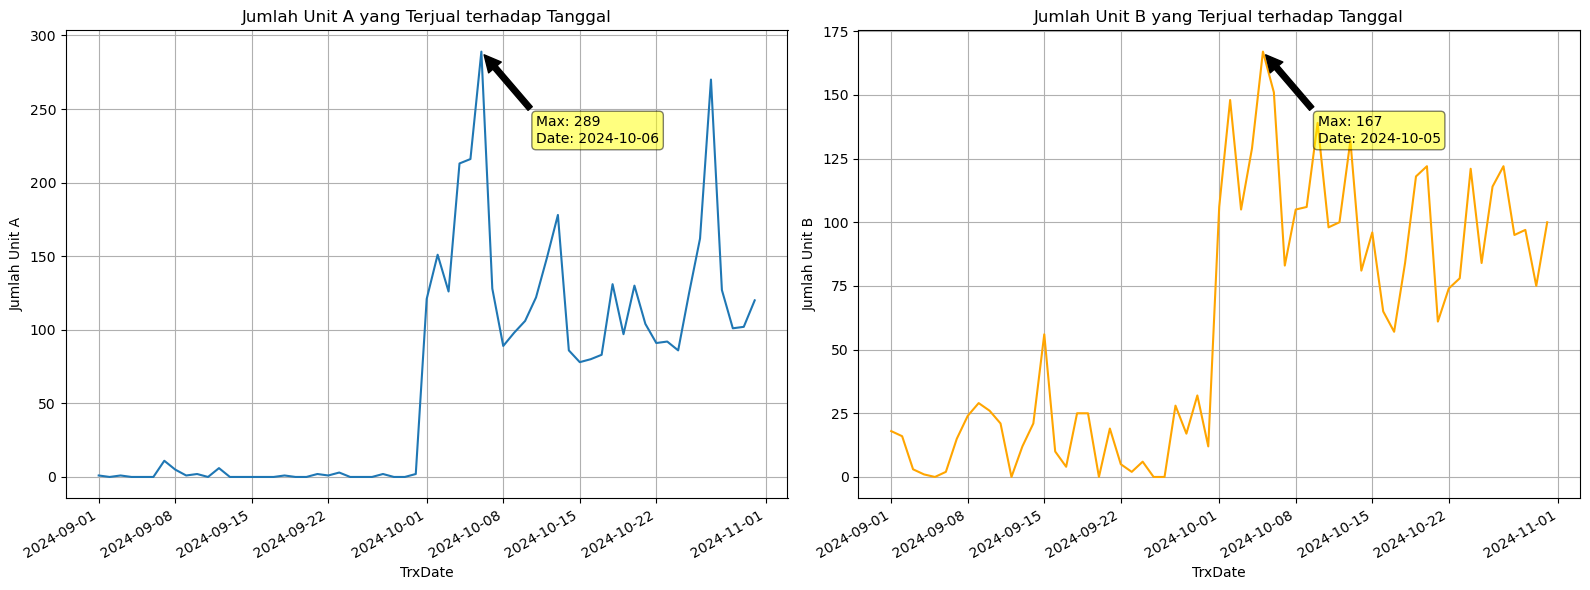

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting Unit_A and Unit_B over time in separate subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Unit_A
axes[0].plot(data['TrxDate'], data['Unit_A'])
axes[0].set_xlabel('TrxDate')
axes[0].set_ylabel('Jumlah Unit A')
axes[0].set_title('Jumlah Unit A yang Terjual terhadap Tanggal')
axes[0].grid(True)
# Improve x-axis formatting for Unit_A
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[0].xaxis.set_major_locator(mdates.AutoDateLocator())
fig.autofmt_xdate()  # Auto-rotate date labels

# Cari puncak Unit_A
max_idx_A = data['Unit_A'].idxmax()
max_date_A = data.loc[max_idx_A, 'TrxDate']
max_value_A = data.loc[max_idx_A, 'Unit_A']
max_date_str_A = max_date_A.strftime('%Y-%m-%d')  # Format tanggal jadi string

# Tandai puncak Unit_A dengan tanggal dan nilai, posisi anotasi agak ke bawah
axes[0].annotate(
    f'Max: {max_value_A}\nDate: {max_date_str_A}',
    xy=(max_date_A, max_value_A),
    xytext=(max_date_A + pd.Timedelta(days=5), max_value_A * 0.85),  # ke kanan & agak turun
    arrowprops=dict(facecolor='black', shrink=0.05),
    ha='left',
    va='top',
    bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5)
)

# Plot Unit_B
axes[1].plot(data['TrxDate'], data['Unit_B'], color='orange')
axes[1].set_xlabel('TrxDate')
axes[1].set_ylabel('Jumlah Unit B')
axes[1].set_title('Jumlah Unit B yang Terjual terhadap Tanggal')
axes[1].grid(True)
# Improve x-axis formatting for Unit_B
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axes[1].xaxis.set_major_locator(mdates.AutoDateLocator())
fig.autofmt_xdate()  # Auto-rotate date labels

# Cari puncak Unit_B
max_idx_B = data['Unit_B'].idxmax()
max_date_B = data.loc[max_idx_B, 'TrxDate']
max_value_B = data.loc[max_idx_B, 'Unit_B']
max_date_str_B = max_date_B.strftime('%Y-%m-%d')  # Format tanggal jadi string

# Tandai puncak Unit_B dengan tanggal dan nilai, posisi anotasi agak ke bawah
axes[1].annotate(
    f'Max: {max_value_B}\nDate: {max_date_str_B}',
    xy=(max_date_B, max_value_B),
    xytext=(max_date_B + pd.Timedelta(days=5), max_value_B * 0.85),  # ke kanan & agak turun
    arrowprops=dict(facecolor='black', shrink=0.05),
    ha='left',
    va='top',
    bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5)
)

plt.tight_layout()  # Adjust layout to prevent overlapping titles/labels
plt.show()

## Matriks Korelasi

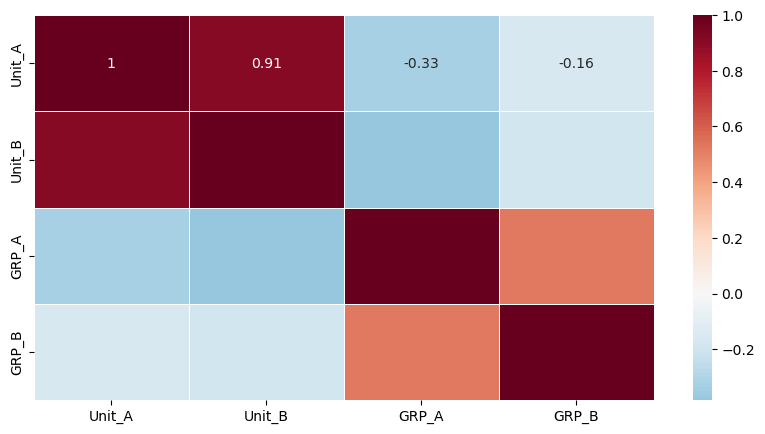

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.heatmap(data[['Unit_A', 'Unit_B', 'GRP_A', 'GRP_B']].corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap='RdBu_r')
plt.show()

## Hubungan Antarpeubah Numerik

c:\Users\Shabrina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Shabrina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Shabrina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Shabrina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

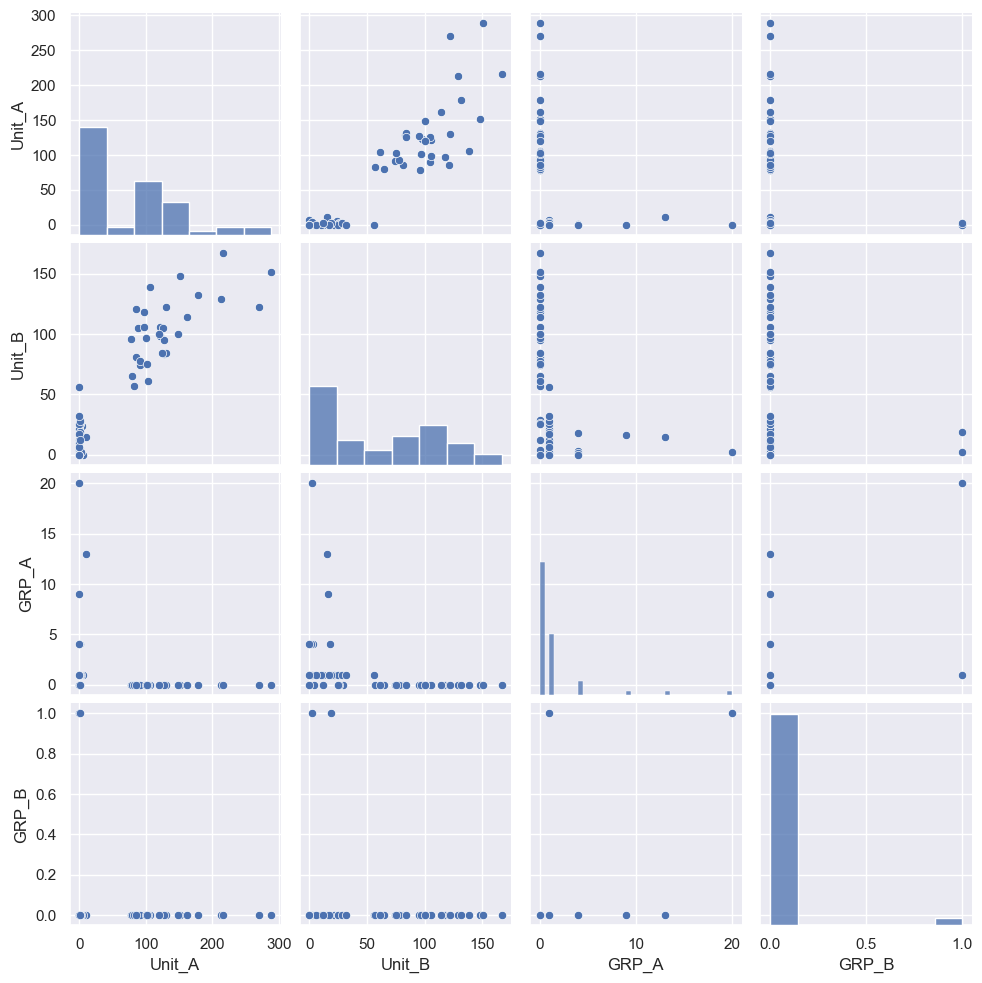

In [29]:
width = 4
height = 6
sns.set(rc={'figure.figsize': (width, height)})
sns.set(font_scale=1)
sns.pairplot(data[['Unit_A', 'Unit_B', 'GRP_A', 'GRP_B']])

## Sebaran Day

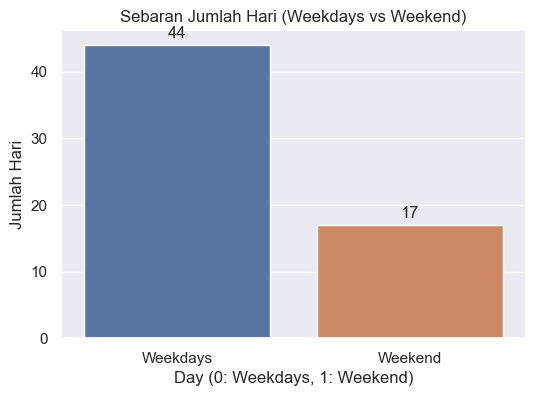

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung frekuensi dari setiap kategori pada kolom 'Day'
day_counts = data['Day'].value_counts().reset_index()
day_counts.columns = ['Day', 'Jumlah Hari']  # Rename columns for clarity

# Membuat bar plot untuk sebaran 'Day'
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Day', y='Jumlah Hari', data=day_counts)
plt.xlabel('Day (0: Weekdays, 1: Weekend)')
plt.ylabel('Jumlah Hari')
plt.title('Sebaran Jumlah Hari (Weekdays vs Weekend)')
plt.xticks([0, 1], ['Weekdays', 'Weekend'])  # Memberi label pada sumbu x

# Menambahkan label jumlah di atas tiap bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, f'{int(height)}', ha='center')

plt.show()

## Sebaran Toko

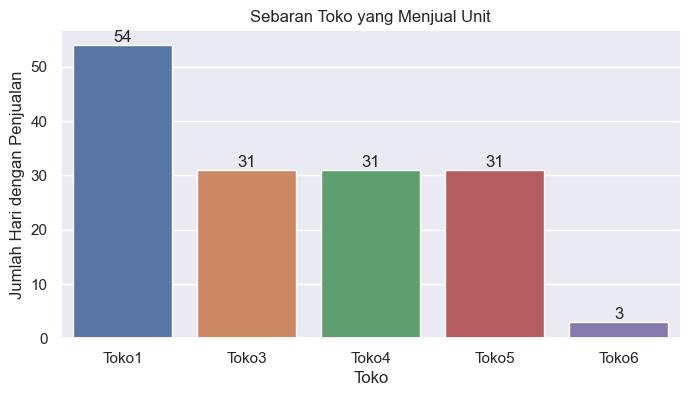

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the 'Toko' columns
toko_cols = ['Toko1', 'Toko3', 'Toko4', 'Toko5', 'Toko6']
toko_data = data[toko_cols]

# Hitung frekuensi penjualan (jumlah 1)
toko_counts = toko_data.sum().reset_index()
toko_counts.columns = ['Toko', 'Jumlah Hari dengan Penjualan']

# Plot bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='Toko', y='Jumlah Hari dengan Penjualan', data=toko_counts)

plt.xlabel('Toko')
plt.ylabel('Jumlah Hari dengan Penjualan')
plt.title('Sebaran Toko yang Menjual Unit')

# Tambahkan label frekuensi di atas batang
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5,  # Posisi di tengah atas batang, +0.5 agar nggak nempel
            f'{int(height)}',  # Tampilkan angka sebagai integer
            ha='center')

plt.show()

## Identifikasi Pencilan

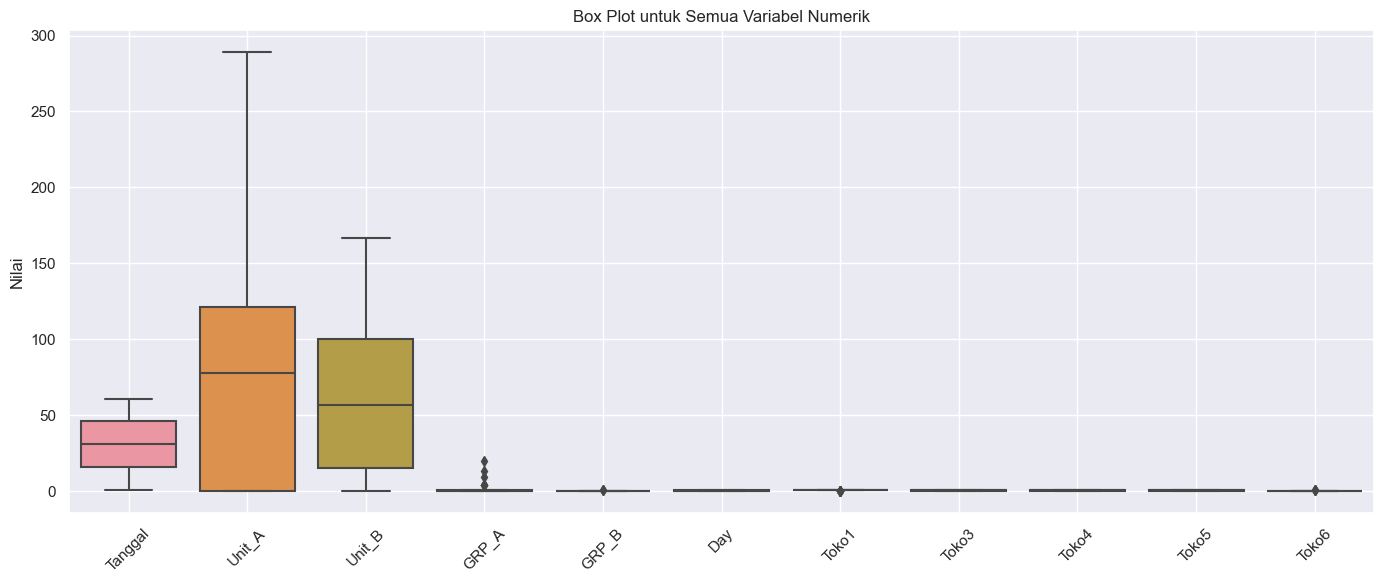

📌 Deteksi Outlier Berdasarkan IQR:

🔹 Tanggal — Jumlah Outlier: 0
----------------------------------------
🔹 Unit_A — Jumlah Outlier: 0
----------------------------------------
🔹 Unit_B — Jumlah Outlier: 0
----------------------------------------
🔹 GRP_A — Jumlah Outlier: 7
   GRP_A
0      4
1      9
2      4
3      4
4      4
----------------------------------------
🔹 GRP_B — Jumlah Outlier: 2
    GRP_B
5       1
20      1
----------------------------------------
🔹 Day — Jumlah Outlier: 0
----------------------------------------
🔹 Toko1 — Jumlah Outlier: 7
    Toko1
4       0
19      0
24      0
25      0
50      0
----------------------------------------
🔹 Toko3 — Jumlah Outlier: 0
----------------------------------------
🔹 Toko4 — Jumlah Outlier: 0
----------------------------------------
🔹 Toko5 — Jumlah Outlier: 0
----------------------------------------
🔹 Toko6 — Jumlah Outlier: 3
    Toko6
58      1
59      1
60      1
----------------------------------------


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Tampilkan boxplot semua kolom numerik
plt.figure(figsize=(14, 6))
sns.boxplot(data=data.select_dtypes(include='number'))
plt.title('Box Plot untuk Semua Variabel Numerik')
plt.xticks(rotation=45)
plt.ylabel('Nilai')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Cek outlier secara otomatis menggunakan IQR untuk setiap kolom numerik
numeric_cols = data.select_dtypes(include='number').columns

print("📌 Deteksi Outlier Berdasarkan IQR:\n")
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]

    print(f"🔹 {col} — Jumlah Outlier: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers[[col]].head())
    print("-" * 40)

## Pengaruh Iklan terhadap Penjualan Unit Manufaktur A

Pengarh iklan terhadap penjualan unit manufaktur A dapat dilihat menggunakan Cross Correlation Function (CCF), yakni mencari lag dengan korelasi positif yang signifikan.

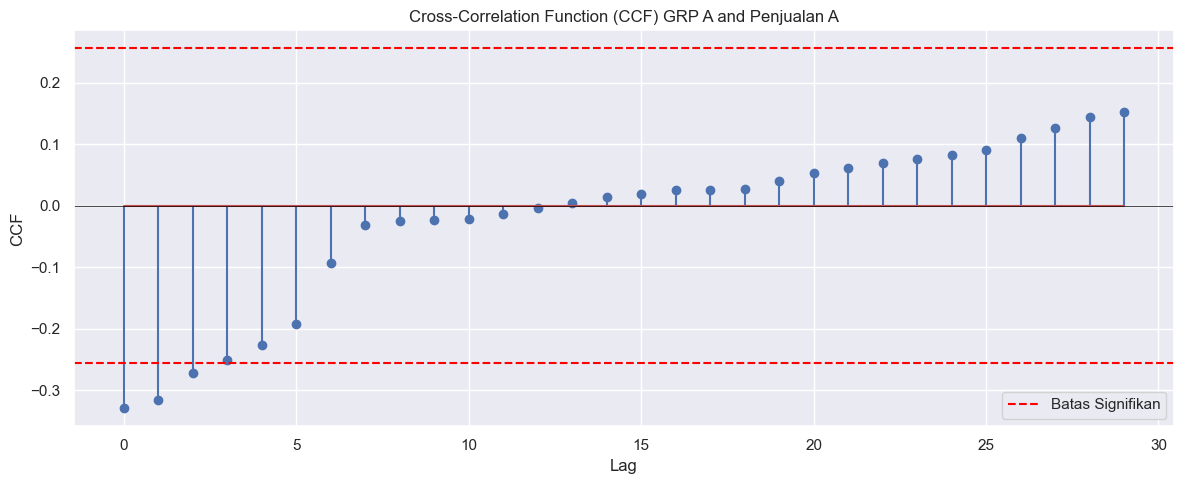

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

grp_a = data['GRP_A']
sales_a = data['Unit_A']

# Hitung CCF
ccf_values = sm.tsa.stattools.ccf(grp_a, sales_a, adjusted=False)[:30]
n = len(grp_a)  # asumsikan panjang data sama

# Hitung satu batas signifikan tetap
significance_level = 2 / np.sqrt(n)

# Plot
plt.figure(figsize=(12, 5))
plt.stem(range(30), ccf_values)
plt.axhline(0, color='black', linewidth=0.5)
plt.axhline(significance_level, color='red', linestyle='--', label='Batas Signifikan')
plt.axhline(-significance_level, color='red', linestyle='--')

plt.xlabel("Lag")
plt.ylabel("CCF")
plt.title("Cross-Correlation Function (CCF) GRP A and Penjualan A")
plt.legend()
plt.tight_layout()
plt.show()

# Bayes MMM

In [35]:
import numpy as np

def apply_adstock(x, L, P, D):
    """
    Fungsi untuk menghitung nilai adstock dari variabel media/iklan.

    Parameters:
    - x: array atau list berisi nilai media (contoh: GRP_A)
    - L: panjang window (berapa hari efek iklan bertahan)
    - P: posisi peak (delay hari saat efek tertinggi)
    - D: decay rate (berapa besar efek menurun tiap hari)

    Returns:
    - adstocked_x: array nilai media setelah diadstock
    """

    # Tambahkan padding nol di awal agar index aman untuk window L
    x = np.append(np.zeros(L-1), x)

    # Buat bobot dengan formula Gaussian decay berdasarkan delay
    weights = np.zeros(L)
    for l in range(L):
        weights[L-1 - l] = D ** ((l - P) ** 2)

    # Hitung nilai adstock dengan weighted average pada window L
    adstocked_x = []
    for i in range(L-1, len(x)):
        window = x[i-L+1:i+1]
        weighted_sum = np.sum(window * weights)
        adstocked_value = weighted_sum / np.sum(weights)
        adstocked_x.append(adstocked_value)

    return np.array(adstocked_x)


In [36]:
data['GRP_A_adstock'] = apply_adstock(data['GRP_A'].values, L=7, P=1, D=0.7)
data['GRP_B_adstock'] = apply_adstock(data['GRP_B'].values, L=7, P=1, D=0.7)

In [37]:
print(data.columns)

Index(['TrxDate', 'Tanggal', 'Unit_A', 'Unit_B', 'GRP_A', 'GRP_B', 'Day',
       'Toko1', 'Toko3', 'Toko4', 'Toko5', 'Toko6', 'GRP_A_adstock',
       'GRP_B_adstock'],
      dtype='object')


In [38]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Pilih fitur (X) dan target (y)
X = data[['Unit_B','GRP_A_adstock', 'GRP_B_adstock', 'Day', 'Toko1', 'Toko3', 'Toko4', 'Toko5', 'Toko6']]
y = data['Unit_A'].values.reshape(-1, 1)

# Standarisasi dengan RobustScaler
scaler_X = RobustScaler()
scaler_y = RobustScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.3, random_state=42
)

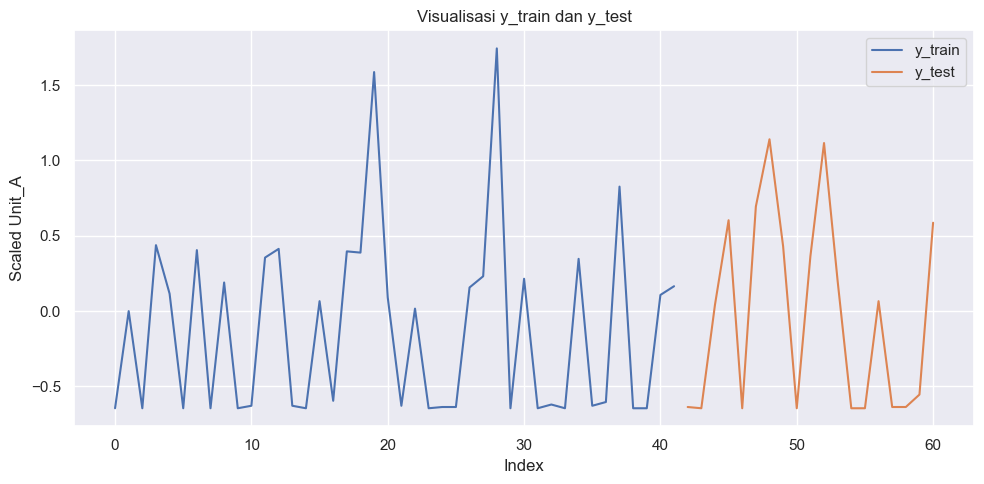

In [39]:
import numpy as np

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(y_train)), y_train, label='y_train')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='y_test')
plt.xlabel('Index')
plt.ylabel('Scaled Unit_A')
plt.title('Visualisasi y_train dan y_test')
plt.legend()
plt.tight_layout()
plt.show()

# Model

## LSTM

### PSO

2025-06-21 15:37:41,946 - pyswarms.single.global_best - INFO - Optimize for 8 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/8c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2025-06-21 15:38:38,539 - tensorflow - WARNING - 5 out of the last 5 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000025C9C735D00> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2025-06-21 15:38:58,516 - tensorflow - WARNING - 6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000025C9EC72020> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


pyswarms.single.global_best:  12%|█▎        |1/8, best_cost=0.212c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step


pyswarms.single.global_best:  25%|██▌       |2/8, best_cost=0.212c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step


pyswarms.single.global_best:  38%|███▊      |3/8, best_cost=0.212c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


pyswarms.single.global_best:  50%|█████     |4/8, best_cost=0.212c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


pyswarms.single.global_best:  62%|██████▎   |5/8, best_cost=0.212c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


pyswarms.single.global_best:  75%|███████▌  |6/8, best_cost=0.212c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


pyswarms.single.global_best:  88%|████████▊ |7/8, best_cost=0.212c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


pyswarms.single.global_best: 100%|██████████|8/8, best_cost=0.212
2025-06-21 15:53:27,079 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.21227749707289426, best pos: [93.47060145 16.46313733  0.25955052 13.78054155 54.04192098]
c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Best LSTM params (PSO): lstm_units=93, dense_units=16, dropout=0.2595505170904626, batch_size=13, epochs=54
RMSE Train: 34.48
RMSE Test: 27.58


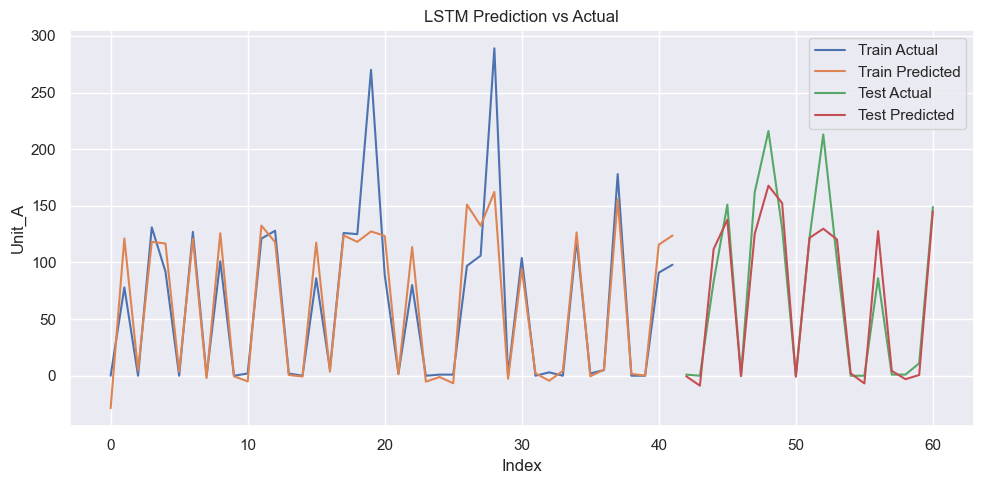

In [41]:
import numpy as np
np.random.seed(123)

import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from pyswarms.single.global_best import GlobalBestPSO

# Fungsi untuk membangun dan melatih model LSTM
def lstm_objective(params):
    results = []
    for p in params:
        lstm_units = int(np.clip(p[0], 16, 128))
        dense_units = int(np.clip(p[1], 8, 64))
        dropout = float(np.clip(p[2], 0.1, 0.5))
        batch_size = int(np.clip(p[3], 8, 32))
        epochs = int(np.clip(p[4], 30, 100))
        try:
            model = Sequential()
            model.add(LSTM(lstm_units, input_shape=(X_train.shape[1], 1)))
            model.add(Dropout(dropout))
            model.add(Dense(dense_units, activation='relu'))
            model.add(Dense(1))
            model.compile(optimizer='adam', loss='mse')
            es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
            model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                      validation_split=0.2, verbose=0, callbacks=[es])
            y_pred = model.predict(X_test)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        except Exception:
            rmse = 1e6
        results.append(rmse)
    return np.array(results)

# Pastikan X_train/X_test berdimensi (samples, time_steps, features)
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# PSO bounds: [lstm_units, dense_units, dropout, batch_size, epochs]
bounds = ([16, 8, 0.1, 8, 30], [128, 64, 0.5, 32, 100])
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

optimizer = GlobalBestPSO(n_particles=8, dimensions=5, options=options, bounds=bounds)
best_cost, best_pos = optimizer.optimize(lstm_objective, iters=8)

# Train LSTM dengan parameter terbaik
lstm_units = int(np.clip(best_pos[0], 16, 128))
dense_units = int(np.clip(best_pos[1], 8, 64))
dropout = float(np.clip(best_pos[2], 0.1, 0.5))
batch_size = int(np.clip(best_pos[3], 8, 32))
epochs = int(np.clip(best_pos[4], 30, 100))

model = Sequential()
model.add(LSTM(lstm_units, input_shape=(X_train_lstm.shape[1], 1)))
model.add(Dropout(dropout))
model.add(Dense(dense_units, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
model.fit(X_train_lstm, y_train, epochs=epochs, batch_size=batch_size,
          validation_split=0.2, verbose=0, callbacks=[es])

# Prediksi dan inverse scaling
y_train_pred = model.predict(X_train_lstm)
y_test_pred = model.predict(X_test_lstm)
y_train_inv = scaler_y.inverse_transform(y_train)
y_test_inv = scaler_y.inverse_transform(y_test)
y_train_pred_inv = scaler_y.inverse_transform(y_train_pred)
y_test_pred_inv = scaler_y.inverse_transform(y_test_pred)

# Hitung RMSE
rmse_train = np.sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
rmse_test = np.sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))

print(f"Best LSTM params (PSO): lstm_units={lstm_units}, dense_units={dense_units}, dropout={dropout}, batch_size={batch_size}, epochs={epochs}")
print(f"RMSE Train: {rmse_train:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")

# Plot hasil prediksi vs aktual
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(y_train_inv)), y_train_inv, label='Train Actual')
plt.plot(np.arange(len(y_train_inv)), y_train_pred_inv, label='Train Predicted')
plt.plot(np.arange(len(y_train_inv), len(y_train_inv) + len(y_test_inv)), y_test_inv, label='Test Actual')
plt.plot(np.arange(len(y_train_inv), len(y_train_inv) + len(y_test_inv)), y_test_pred_inv, label='Test Predicted')
plt.xlabel('Index')
plt.ylabel('Unit_A')
plt.title('LSTM Prediction vs Actual')
plt.legend()
plt.tight_layout()
plt.show()

## XGBoost

### Grid Search

Best XGBoost params (Grid Search): {'alpha': 0.1, 'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}
Best RMSE: 0.20
RMSE Train: 17.86
RMSE Test: 24.66


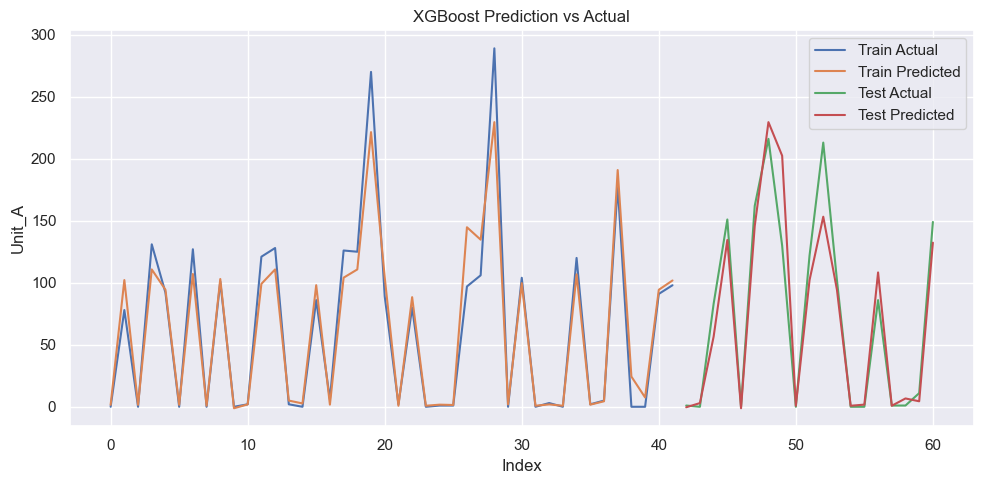

In [43]:
import numpy as np
np.random.seed(123)

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk membangun dan melatih model XGBoost
def xgboost_objective(n_estimators, max_depth, learning_rate, colsample_bytree, subsample, alpha):
    try:
        model = xgb.XGBRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            colsample_bytree=colsample_bytree,
            subsample=subsample,
            alpha=alpha,
            objective='reg:squarederror',  # untuk regresi
            eval_metric='rmse'  # Menggunakan RMSE untuk evaluasi
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    except Exception:
        rmse = 1e6  # Jika terjadi error, beri nilai RMSE yang sangat besar
    return rmse

# Pastikan X_train/X_test berdimensi (samples, features), jadi kita reshape data untuk XGBoost
X_train_xgb = X_train.reshape((X_train.shape[0], X_train.shape[1]))  # reshape menjadi 2D array
X_test_xgb = X_test.reshape((X_test.shape[0], X_test.shape[1]))  # reshape menjadi 2D array

# Parameter grid yang akan dicari
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'subsample': [0.6, 0.8, 1.0],
    'alpha': [0, 0.01, 0.1]  # Regularization term (L1)
}

# Buat grid dan evaluasi setiap kombinasi parameter
grid = ParameterGrid(param_grid)
best_rmse = float('inf')
best_params = None

for params in grid:
    n_estimators = params['n_estimators']
    max_depth = params['max_depth']
    learning_rate = params['learning_rate']
    colsample_bytree = params['colsample_bytree']
    subsample = params['subsample']
    alpha = params['alpha']
    
    # Evaluasi model dengan kombinasi parameter saat ini
    rmse = xgboost_objective(n_estimators, max_depth, learning_rate, colsample_bytree, subsample, alpha)
    
    # Simpan parameter terbaik berdasarkan RMSE terendah
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params

# Print the best parameters and RMSE
print(f"Best XGBoost params (Grid Search): {best_params}")
print(f"Best RMSE: {best_rmse:.2f}")

# Train model dengan parameter terbaik
n_estimators = best_params['n_estimators']
max_depth = best_params['max_depth']
learning_rate = best_params['learning_rate']
colsample_bytree = best_params['colsample_bytree']
subsample = best_params['subsample']
alpha = best_params['alpha']

# Train the final XGBoost model with the best parameters
model = xgb.XGBRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    learning_rate=learning_rate,
    colsample_bytree=colsample_bytree,
    subsample=subsample,
    alpha=alpha,
    objective='reg:squarederror',
    eval_metric='rmse'
)

# Fit the model on the training data
model.fit(X_train_xgb, y_train)

# Prediksi dan inverse scaling
y_train_pred = model.predict(X_train_xgb)
y_test_pred = model.predict(X_test_xgb)
y_train_inv = scaler_y.inverse_transform(y_train)
y_test_inv = scaler_y.inverse_transform(y_test)
y_train_pred_inv = scaler_y.inverse_transform(y_train_pred.reshape(-1, 1))
y_test_pred_inv = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1))

# Hitung RMSE
rmse_train = np.sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
rmse_test = np.sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))

print(f"RMSE Train: {rmse_train:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")

# Plot hasil prediksi vs aktual
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(y_train_inv)), y_train_inv, label='Train Actual')
plt.plot(np.arange(len(y_train_inv)), y_train_pred_inv, label='Train Predicted')
plt.plot(np.arange(len(y_train_inv), len(y_train_inv) + len(y_test_inv)), y_test_inv, label='Test Actual')
plt.plot(np.arange(len(y_train_inv), len(y_train_inv) + len(y_test_inv)), y_test_pred_inv, label='Test Predicted')
plt.xlabel('Index')
plt.ylabel('Unit_A')
plt.title('XGBoost Prediction vs Actual')
plt.legend()
plt.tight_layout()
plt.show()


### PSO

2025-06-21 16:34:50,653 - pyswarms.single.global_best - INFO - Optimize for 8 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|8/8, best_cost=0.197
2025-06-21 16:34:55,015 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.19660017042872713, best pos: [5.27433936e+01 7.56913564e+00 5.95044177e-02 6.54982779e-01
 6.03172439e-01 3.50855561e-02]


Best XGBoost params (PSO): [5.27433936e+01 7.56913564e+00 5.95044177e-02 6.54982779e-01
 6.03172439e-01 3.50855561e-02]
Best RMSE: 0.20
RMSE Train: 21.07
RMSE Test: 23.79


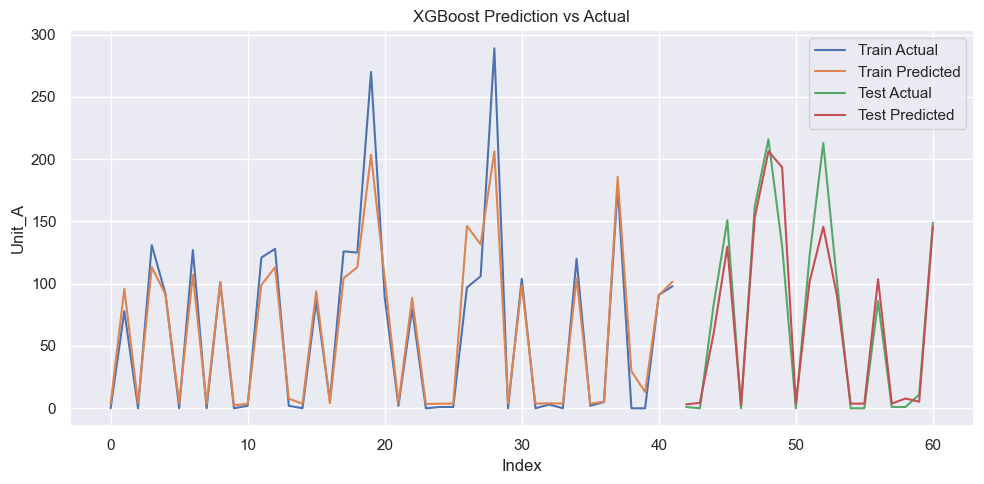

In [62]:
import numpy as np
np.random.seed(1234)

import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from pyswarms.single.global_best import GlobalBestPSO
from keras import regularizers

# Fungsi untuk membangun dan melatih model XGBoost dengan PSO
def xgboost_objective(params):
    results = []
    for p in params:
        n_estimators = int(np.clip(p[0], 50, 200))
        max_depth = int(np.clip(p[1], 3, 9))
        learning_rate = np.clip(p[2], 0.01, 0.2)
        colsample_bytree = np.clip(p[3], 0.6, 1.0)
        subsample = np.clip(p[4], 0.6, 1.0)
        alpha = np.clip(p[5], 0, 0.1)
        
        try:
            model = xgb.XGBRegressor(
                n_estimators=n_estimators,
                max_depth=max_depth,
                learning_rate=learning_rate,
                colsample_bytree=colsample_bytree,
                subsample=subsample,
                alpha=alpha,
                objective='reg:squarederror',  # Untuk regresi
                eval_metric='rmse'  # Menggunakan RMSE untuk evaluasi
            )
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        except Exception:
            rmse = 1e6  # Jika terjadi error, beri nilai RMSE yang sangat besar
        results.append(rmse)
    
    return np.array(results)

# Pastikan X_train/X_test berdimensi (samples, features), jadi kita reshape data untuk XGBoost
X_train_xgb = X_train.reshape((X_train.shape[0], X_train.shape[1]))  # reshape menjadi 2D array
X_test_xgb = X_test.reshape((X_test.shape[0], X_test.shape[1]))  # reshape menjadi 2D array

# PSO bounds: [n_estimators, max_depth, learning_rate, colsample_bytree, subsample, alpha]
bounds = ([50, 3, 0.01, 0.6, 0.6, 0], [200, 9, 0.2, 1.0, 1.0, 0.1])
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# Setup PSO
optimizer = GlobalBestPSO(n_particles=8, dimensions=6, options=options, bounds=bounds)

# Melakukan optimasi menggunakan PSO
best_cost, best_pos = optimizer.optimize(xgboost_objective, iters=8)

# Print best parameters and cost (RMSE)
print(f"Best XGBoost params (PSO): {best_pos}")
print(f"Best RMSE: {best_cost:.2f}")

# Train model dengan parameter terbaik
n_estimators = int(np.clip(best_pos[0], 50, 200))
max_depth = int(np.clip(best_pos[1], 3, 9))
learning_rate = np.clip(best_pos[2], 0.01, 0.2)
colsample_bytree = np.clip(best_pos[3], 0.6, 1.0)
subsample = np.clip(best_pos[4], 0.6, 1.0)
alpha = np.clip(best_pos[5], 0, 0.1)

# Train the final XGBoost model with the best parameters
model = xgb.XGBRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    learning_rate=learning_rate,
    colsample_bytree=colsample_bytree,
    subsample=subsample,
    alpha=alpha,
    objective='reg:squarederror',
    eval_metric='rmse'
)

# Fit the model on the training data
model.fit(X_train_xgb, y_train)

# Prediksi dan inverse scaling
y_train_pred = model.predict(X_train_xgb)
y_test_pred = model.predict(X_test_xgb)
y_train_inv = scaler_y.inverse_transform(y_train)
y_test_inv = scaler_y.inverse_transform(y_test)
y_train_pred_inv = scaler_y.inverse_transform(y_train_pred.reshape(-1, 1))
y_test_pred_inv = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1))

# Hitung RMSE
rmse_train = np.sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
rmse_test = np.sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))

print(f"RMSE Train: {rmse_train:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")

# Plot hasil prediksi vs aktual
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(y_train_inv)), y_train_inv, label='Train Actual')
plt.plot(np.arange(len(y_train_inv)), y_train_pred_inv, label='Train Predicted')
plt.plot(np.arange(len(y_train_inv), len(y_train_inv) + len(y_test_inv)), y_test_inv, label='Test Actual')
plt.plot(np.arange(len(y_train_inv), len(y_train_inv) + len(y_test_inv)), y_test_pred_inv, label='Test Predicted')
plt.xlabel('Index')
plt.ylabel('Unit_A')
plt.title('XGBoost Prediction vs Actual')
plt.legend()
plt.tight_layout()
plt.show()


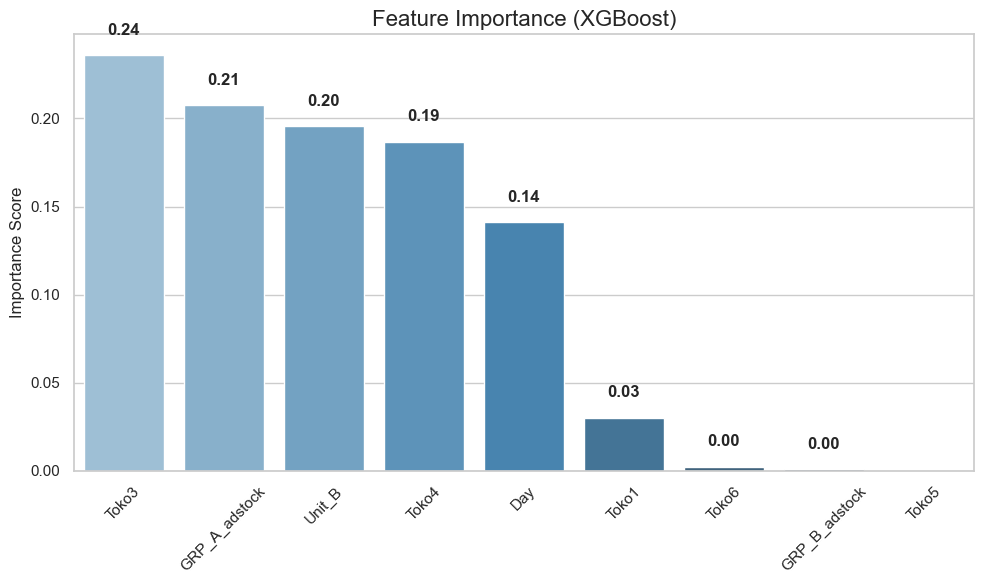

In [67]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Daftar nama fitur sesuai urutan pada X_train
feature_names = ['Unit_B','GRP_A_adstock', 'GRP_B_adstock', 'Day', 'Toko1', 'Toko3', 'Toko4', 'Toko5', 'Toko6']

# Ambil importance-nya
importance = model.feature_importances_

# Buat DataFrame dan sort
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

ax = sns.barplot(x='Feature', y='Importance', data=importance_df, palette='Blues_d')

# Tambahkan label di atas setiap batang
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,
            f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=12,
            fontweight='bold'
        )

plt.title('Feature Importance (XGBoost)', fontsize=16)
plt.ylabel('Importance Score')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Prophet

In [53]:
# Definisikan df_prophet untuk Prophet: gunakan data['TrxDate'] sebagai ds dan data['Unit_A'] sebagai y
df_prophet = data[['TrxDate', 'Unit_A']].rename(columns={'TrxDate': 'ds', 'Unit_A': 'y'})
df_prophet.head()

,ds,y
0,2024-09-01,1
1,2024-09-02,0
2,2024-09-03,1
3,2024-09-04,0
4,2024-09-05,0


16:03:21 - cmdstanpy - INFO - Chain [1] start processing
2025-06-21 16:03:21,045 - cmdstanpy - INFO - Chain [1] start processing
16:03:22 - cmdstanpy - INFO - Chain [1] done processing
2025-06-21 16:03:22,819 - cmdstanpy - INFO - Chain [1] done processing
16:03:23 - cmdstanpy - INFO - Chain [1] start processing
2025-06-21 16:03:23,007 - cmdstanpy - INFO - Chain [1] start processing
16:03:23 - cmdstanpy - INFO - Chain [1] done processing
2025-06-21 16:03:23,105 - cmdstanpy - INFO - Chain [1] done processing
16:03:23 - cmdstanpy - INFO - Chain [1] start processing
2025-06-21 16:03:23,223 - cmdstanpy - INFO - Chain [1] start processing
16:03:23 - cmdstanpy - INFO - Chain [1] done processing
2025-06-21 16:03:23,324 - cmdstanpy - INFO - Chain [1] done processing
16:03:23 - cmdstanpy - INFO - Chain [1] start processing
2025-06-21 16:03:23,433 - cmdstanpy - INFO - Chain [1] start processing
16:03:23 - cmdstanpy - INFO - Chain [1] done processing
2025-06-21 16:03:23,533 - cmdstanpy - INFO - Ch

Best Prophet Params: {'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 5.0, 'seasonality_mode': 'multiplicative'}
RMSE Prophet: 16.31


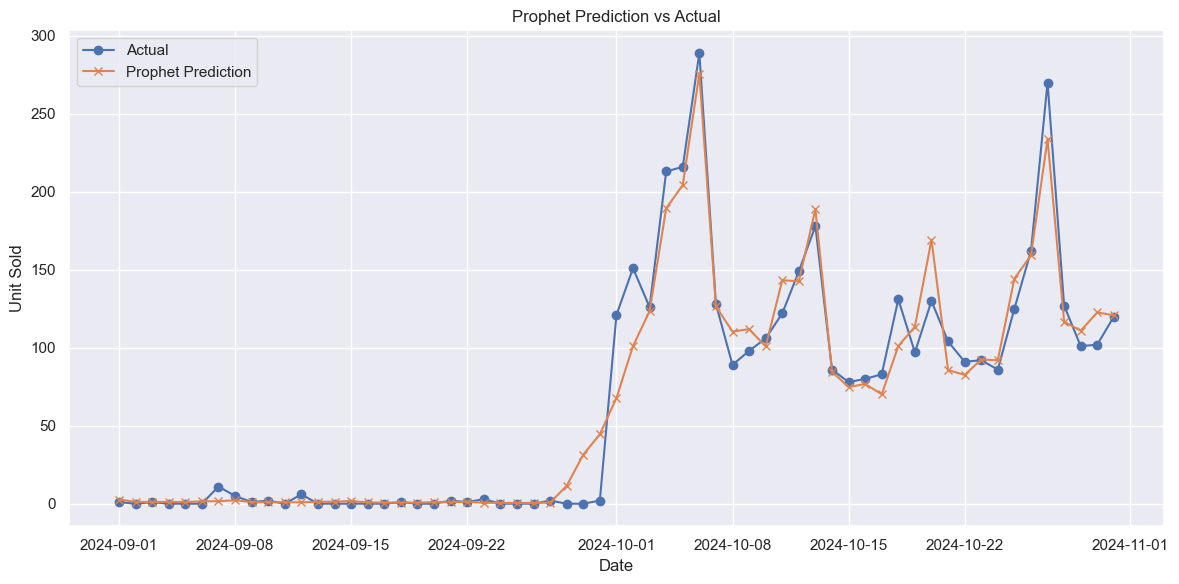

In [56]:
import numpy as np
np.random.seed(123)

!pip install prophet
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.diagnostics import generate_cutoffs
from prophet.plot import plot_plotly
from sklearn.metrics import mean_squared_error
import numpy as np

import matplotlib.pyplot as plt

# Fungsi untuk optimasi parameter Prophet (grid search sederhana)
def prophet_grid_search(df, param_grid):
    best_rmse = float('inf')
    best_params = None
    best_model = None
    best_forecast = None

    for changepoint_prior_scale in param_grid['changepoint_prior_scale']:
        for seasonality_prior_scale in param_grid['seasonality_prior_scale']:
            for seasonality_mode in param_grid['seasonality_mode']:
                model = Prophet(
                    changepoint_prior_scale=changepoint_prior_scale,
                    seasonality_prior_scale=seasonality_prior_scale,
                    seasonality_mode=seasonality_mode,
                    weekly_seasonality=True,
                    yearly_seasonality=False,
                    daily_seasonality=False
                )
                model.fit(df)
                forecast = model.predict(df[['ds']])
                rmse = np.sqrt(mean_squared_error(df['y'], forecast['yhat']))
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_params = {
                        'changepoint_prior_scale': changepoint_prior_scale,
                        'seasonality_prior_scale': seasonality_prior_scale,
                        'seasonality_mode': seasonality_mode
                    }
                    best_model = model
                    best_forecast = forecast
    return best_model, best_forecast, best_params, best_rmse

# Grid parameter Prophet
param_grid = {
    'changepoint_prior_scale': [0.01, 0.05, 0.1, 0.5],
    'seasonality_prior_scale': [1.0, 5.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}

# Optimasi Prophet
best_model, best_forecast, best_params, best_rmse = prophet_grid_search(df_prophet, param_grid)

print("Best Prophet Params:", best_params)
print(f"RMSE Prophet: {best_rmse:.2f}")

# Plot hasil prediksi Prophet
plt.figure(figsize=(12, 6))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual', marker='o')
plt.plot(best_forecast['ds'], best_forecast['yhat'], label='Prophet Prediction', marker='x')
plt.xlabel('Date')
plt.ylabel('Unit Sold')
plt.title('Prophet Prediction vs Actual')
plt.legend()
plt.tight_layout()
plt.show()

## TCN

2025-06-21 16:03:45,484 - pyswarms.single.global_best - INFO - Optimize for 8 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/8c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


pyswarms.single.global_best:  12%|█▎        |1/8, best_cost=0.204c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


pyswarms.single.global_best:  25%|██▌       |2/8, best_cost=0.195c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


pyswarms.single.global_best:  38%|███▊      |3/8, best_cost=0.191c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


pyswarms.single.global_best:  50%|█████     |4/8, best_cost=0.191c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


pyswarms.single.global_best:  62%|██████▎   |5/8, best_cost=0.191c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


pyswarms.single.global_best:  75%|███████▌  |6/8, best_cost=0.191c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


pyswarms.single.global_best:  88%|████████▊ |7/8, best_cost=0.191c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


pyswarms.single.global_best: 100%|██████████|8/8, best_cost=0.191
2025-06-21 16:08:55,928 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.1906862936760403, best pos: [77.83192849  5.21396068  0.12337845 13.64602133 55.09545199]


Best TCN params (PSO): [77.83192849  5.21396068  0.12337845 13.64602133 55.09545199]
Best RMSE: 0.19


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
RMSE Train: 29.43
RMSE Test: 23.10


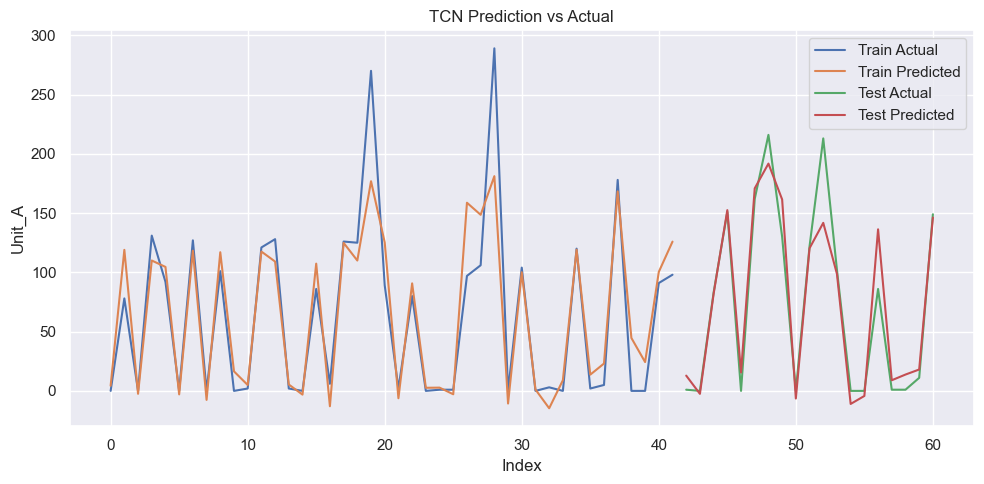

In [57]:
import numpy as np
np.random.seed(123)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping
from pyswarms.single.global_best import GlobalBestPSO
from keras import regularizers

# Fungsi untuk membangun dan melatih model TCN dengan PSO
def tcn_objective(params):
    results = []
    for p in params:
        n_filters = int(np.clip(p[0], 16, 128))
        kernel_size = int(np.clip(p[1], 2, 8))
        dropout = np.clip(p[2], 0.1, 0.5)
        batch_size = int(np.clip(p[3], 8, 32))
        epochs = int(np.clip(p[4], 30, 100))
        
        try:
            model = Sequential()
            # TCN Layer - menggunakan dilated convolutions
            model.add(Conv1D(filters=n_filters, kernel_size=kernel_size, activation='relu', 
                             padding='causal', dilation_rate=2, input_shape=(X_train.shape[1], 1)))
            model.add(Dropout(dropout))
            model.add(Flatten())
            model.add(Dense(1))  # Output layer untuk prediksi regresi
            
            model.compile(optimizer='adam', loss='mse')
            
            # Early stopping
            es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
            model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                      validation_split=0.2, verbose=0, callbacks=[es])
            
            # Prediksi dan menghitung RMSE
            y_pred = model.predict(X_test)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        except Exception:
            rmse = 1e6  # Return a large RMSE if there is an error
        results.append(rmse)
    
    return np.array(results)

# Pastikan X_train/X_test berdimensi (samples, time_steps, features)
X_train_tcn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_tcn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Parameter grid untuk PSO
param_grid = {
    'n_filters': [16, 32, 64, 128],
    'kernel_size': [2, 3, 5, 8],
    'dropout': [0.1, 0.2, 0.3, 0.5],
    'batch_size': [8, 16, 32],
    'epochs': [30, 50, 100]
}

# PSO bounds: [n_filters, kernel_size, dropout, batch_size, epochs]
bounds = ([16, 2, 0.1, 8, 30], [128, 8, 0.5, 32, 100])
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# Setup PSO
optimizer = GlobalBestPSO(n_particles=8, dimensions=5, options=options, bounds=bounds)

# Melakukan optimasi menggunakan PSO
best_cost, best_pos = optimizer.optimize(tcn_objective, iters=8)

# Print best parameters and cost (RMSE)
print(f"Best TCN params (PSO): {best_pos}")
print(f"Best RMSE: {best_cost:.2f}")

# Train model dengan parameter terbaik
n_filters = int(np.clip(best_pos[0], 16, 128))
kernel_size = int(np.clip(best_pos[1], 2, 8))
dropout = np.clip(best_pos[2], 0.1, 0.5)
batch_size = int(np.clip(best_pos[3], 8, 32))
epochs = int(np.clip(best_pos[4], 30, 100))

# Train the final TCN model with the best parameters
model = Sequential()
model.add(Conv1D(filters=n_filters, kernel_size=kernel_size, activation='relu', 
                 padding='causal', dilation_rate=2, input_shape=(X_train_tcn.shape[1], 1)))
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Fit the model on the training data
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
model.fit(X_train_tcn, y_train, epochs=epochs, batch_size=batch_size,
          validation_split=0.2, verbose=0, callbacks=[es])

# Prediksi dan inverse scaling
y_train_pred = model.predict(X_train_tcn)
y_test_pred = model.predict(X_test_tcn)
y_train_inv = scaler_y.inverse_transform(y_train)
y_test_inv = scaler_y.inverse_transform(y_test)
y_train_pred_inv = scaler_y.inverse_transform(y_train_pred)
y_test_pred_inv = scaler_y.inverse_transform(y_test_pred)

# Hitung RMSE
rmse_train = np.sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
rmse_test = np.sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))

print(f"RMSE Train: {rmse_train:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")

# Plot hasil prediksi vs aktual
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(y_train_inv)), y_train_inv, label='Train Actual')
plt.plot(np.arange(len(y_train_inv)), y_train_pred_inv, label='Train Predicted')
plt.plot(np.arange(len(y_train_inv), len(y_train_inv) + len(y_test_inv)), y_test_inv, label='Test Actual')
plt.plot(np.arange(len(y_train_inv), len(y_train_inv) + len(y_test_inv)), y_test_pred_inv, label='Test Predicted')
plt.xlabel('Index')
plt.ylabel('Unit_A')
plt.title('TCN Prediction vs Actual')
plt.legend()
plt.tight_layout()
plt.show()


## GRU-LSTM

### PSO

2025-06-21 16:11:43,485 - pyswarms.single.global_best - INFO - Optimize for 8 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/8c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


pyswarms.single.global_best:  12%|█▎        |1/8, best_cost=0.25c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


pyswarms.single.global_best:  25%|██▌       |2/8, best_cost=0.25c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step


pyswarms.single.global_best:  38%|███▊      |3/8, best_cost=0.25c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


pyswarms.single.global_best:  50%|█████     |4/8, best_cost=0.25c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


pyswarms.single.global_best:  62%|██████▎   |5/8, best_cost=0.25c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


pyswarms.single.global_best:  75%|███████▌  |6/8, best_cost=0.25c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


pyswarms.single.global_best:  88%|████████▊ |7/8, best_cost=0.25c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


pyswarms.single.global_best: 100%|██████████|8/8, best_cost=0.236
2025-06-21 16:22:16,908 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.23648404984014842, best pos: [93.39779965 32.58642722  0.13170328 13.23427149 53.37799082]


Best GRU-LSTM params (PSO): [93.39779965 32.58642722  0.13170328 13.23427149 53.37799082]
Best RMSE GRU-LSTM: 0.24


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
RMSE Train (Hybrid GRU-LSTM): 33.08
RMSE Test (Hybrid GRU-LSTM): 29.65


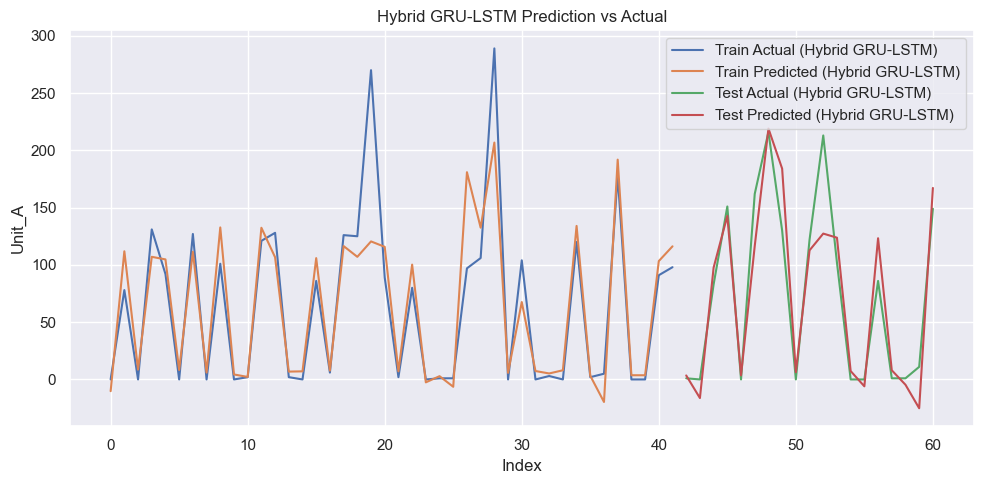

In [58]:
import numpy as np
np.random.seed(123)

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import GRU, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from pyswarms.single.global_best import GlobalBestPSO
from sklearn.metrics import mean_squared_error

# Fungsi untuk membangun dan melatih model GRU-LSTM Hybrid dengan PSO
def gru_lstm_objective(params):
    results = []
    for p in params:
        gru_units = int(np.clip(p[0], 16, 128))
        lstm_units = int(np.clip(p[1], 16, 128))
        dropout = np.clip(p[2], 0.1, 0.5)
        batch_size = int(np.clip(p[3], 8, 32))
        epochs = int(np.clip(p[4], 30, 100))

        try:
            model = Sequential()
            # GRU Layer
            model.add(GRU(gru_units, input_shape=(X_train.shape[1], 1), return_sequences=True))
            model.add(Dropout(dropout))
            
            # LSTM Layer
            model.add(LSTM(lstm_units, return_sequences=False))
            model.add(Dropout(dropout))
            
            # Output Layer
            model.add(Dense(1))
            
            model.compile(optimizer='adam', loss='mse')
            
            # Early stopping
            es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
            model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                      validation_split=0.2, verbose=0, callbacks=[es])
            
            # Prediksi dan menghitung RMSE
            y_pred = model.predict(X_test)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        except Exception:
            rmse = 1e6  # Return a large RMSE if there is an error
        results.append(rmse)
    
    return np.array(results)

# Pastikan X_train/X_test berdimensi (samples, time_steps, features)
X_train_gru_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # reshape menjadi 3D array
X_test_gru_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))      # reshape menjadi 3D array

# Parameter grid untuk PSO
param_grid = {
    'gru_units': [16, 32, 64, 128],
    'lstm_units': [16, 32, 64, 128],
    'dropout': [0.1, 0.2, 0.3, 0.5],
    'batch_size': [8, 16, 32],
    'epochs': [30, 50, 100]
}

# PSO bounds: [gru_units, lstm_units, dropout, batch_size, epochs]
bounds = ([16, 16, 0.1, 8, 30], [128, 128, 0.5, 32, 100])
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# Setup PSO
optimizer = GlobalBestPSO(n_particles=8, dimensions=5, options=options, bounds=bounds)

# Melakukan optimasi menggunakan PSO untuk model Hybrid GRU-LSTM
best_cost_gru_lstm, best_pos_gru_lstm = optimizer.optimize(gru_lstm_objective, iters=8)

# Print best parameters and cost (RMSE) for GRU-LSTM Hybrid
print(f"Best GRU-LSTM params (PSO): {best_pos_gru_lstm}")
print(f"Best RMSE GRU-LSTM: {best_cost_gru_lstm:.2f}")

# Train model Hybrid GRU-LSTM dengan parameter terbaik
gru_units_gru_lstm = int(np.clip(best_pos_gru_lstm[0], 16, 128))
lstm_units_gru_lstm = int(np.clip(best_pos_gru_lstm[1], 16, 128))
dropout_gru_lstm = np.clip(best_pos_gru_lstm[2], 0.1, 0.5)
batch_size_gru_lstm = int(np.clip(best_pos_gru_lstm[3], 8, 32))
epochs_gru_lstm = int(np.clip(best_pos_gru_lstm[4], 30, 100))

# Train the final GRU-LSTM Hybrid model with the best parameters
model_gru_lstm = Sequential()
model_gru_lstm.add(GRU(gru_units_gru_lstm, input_shape=(X_train_gru_lstm.shape[1], 1), return_sequences=True))
model_gru_lstm.add(Dropout(dropout_gru_lstm))
model_gru_lstm.add(LSTM(lstm_units_gru_lstm, return_sequences=False))
model_gru_lstm.add(Dropout(dropout_gru_lstm))
model_gru_lstm.add(Dense(1))

model_gru_lstm.compile(optimizer='adam', loss='mse')
model_gru_lstm.fit(X_train_gru_lstm, y_train, epochs=epochs_gru_lstm, batch_size=batch_size_gru_lstm,
                   validation_split=0.2, verbose=0)

# Prediksi dan inverse scaling
y_train_pred_gru_lstm = model_gru_lstm.predict(X_train_gru_lstm)
y_test_pred_gru_lstm = model_gru_lstm.predict(X_test_gru_lstm)
y_train_inv_gru_lstm = scaler_y.inverse_transform(y_train)
y_test_inv_gru_lstm = scaler_y.inverse_transform(y_test)
y_train_pred_inv_gru_lstm = scaler_y.inverse_transform(y_train_pred_gru_lstm)
y_test_pred_inv_gru_lstm = scaler_y.inverse_transform(y_test_pred_gru_lstm)

# Hitung RMSE untuk Hybrid GRU-LSTM
rmse_train_gru_lstm = np.sqrt(mean_squared_error(y_train_inv_gru_lstm, y_train_pred_inv_gru_lstm))
rmse_test_gru_lstm = np.sqrt(mean_squared_error(y_test_inv_gru_lstm, y_test_pred_inv_gru_lstm))

print(f"RMSE Train (Hybrid GRU-LSTM): {rmse_train_gru_lstm:.2f}")
print(f"RMSE Test (Hybrid GRU-LSTM): {rmse_test_gru_lstm:.2f}")

# Plot hasil prediksi vs aktual untuk Hybrid GRU-LSTM
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(y_train_inv_gru_lstm)), y_train_inv_gru_lstm, label='Train Actual (Hybrid GRU-LSTM)')
plt.plot(np.arange(len(y_train_inv_gru_lstm)), y_train_pred_inv_gru_lstm, label='Train Predicted (Hybrid GRU-LSTM)')
plt.plot(np.arange(len(y_train_inv_gru_lstm), len(y_train_inv_gru_lstm) + len(y_test_inv_gru_lstm)), y_test_inv_gru_lstm, label='Test Actual (Hybrid GRU-LSTM)')
plt.plot(np.arange(len(y_train_inv_gru_lstm), len(y_train_inv_gru_lstm) + len(y_test_inv_gru_lstm)), y_test_pred_inv_gru_lstm, label='Test Predicted (Hybrid GRU-LSTM)')
plt.xlabel('Index')
plt.ylabel('Unit_A')
plt.title('Hybrid GRU-LSTM Prediction vs Actual')
plt.legend()
plt.tight_layout()
plt.show()


### HyperOpt

  0%|          | 0/8 [00:00<?, ?trial/s, best loss=?]

2025-06-08 18:27:28,841 - hyperopt.tpe - INFO - build_posterior_wrapper took 0.001107 seconds
2025-06-08 18:27:28,842 - hyperopt.tpe - INFO - TPE using 0 trials
c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step

 12%|█▎        | 1/8 [00:08<01:00,  8.60s/trial, best loss: 0.24679747240553243]

2025-06-08 18:27:37,438 - hyperopt.tpe - INFO - build_posterior_wrapper took 0.000993 seconds
2025-06-08 18:27:37,440 - hyperopt.tpe - INFO - TPE using 1/1 trials with best loss 0.246797
c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step        
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step       

 25%|██▌       | 2/8 [00:14<00:42,  7.00s/trial, best loss: 0.24679747240553243]

2025-06-08 18:27:43,330 - hyperopt.tpe - INFO - build_posterior_wrapper took 0.002013 seconds
2025-06-08 18:27:43,331 - hyperopt.tpe - INFO - TPE using 2/2 trials with best loss 0.246797
c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step        
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step       

 38%|███▊      | 3/8 [00:19<00:31,  6.26s/trial, best loss: 0.24679747240553243]

2025-06-08 18:27:48,710 - hyperopt.tpe - INFO - build_posterior_wrapper took 0.001477 seconds
2025-06-08 18:27:48,712 - hyperopt.tpe - INFO - TPE using 3/3 trials with best loss 0.246797
c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step        
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step       

 50%|█████     | 4/8 [00:26<00:26,  6.56s/trial, best loss: 0.24679747240553243]

2025-06-08 18:27:55,731 - hyperopt.tpe - INFO - build_posterior_wrapper took 0.001029 seconds
2025-06-08 18:27:55,733 - hyperopt.tpe - INFO - TPE using 4/4 trials with best loss 0.246797
c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step        
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step       

 62%|██████▎   | 5/8 [00:33<00:19,  6.60s/trial, best loss: 0.24679747240553243]

2025-06-08 18:28:02,399 - hyperopt.tpe - INFO - build_posterior_wrapper took 0.002200 seconds
2025-06-08 18:28:02,399 - hyperopt.tpe - INFO - TPE using 5/5 trials with best loss 0.246797
c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step        
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step       

 75%|███████▌  | 6/8 [00:40<00:13,  6.75s/trial, best loss: 0.24679747240553243]

2025-06-08 18:28:09,451 - hyperopt.tpe - INFO - build_posterior_wrapper took 0.001003 seconds
2025-06-08 18:28:09,452 - hyperopt.tpe - INFO - TPE using 6/6 trials with best loss 0.246797
c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step        
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step       

 88%|████████▊ | 7/8 [00:46<00:06,  6.62s/trial, best loss: 0.24679747240553243]

2025-06-08 18:28:15,798 - hyperopt.tpe - INFO - build_posterior_wrapper took 0.001417 seconds
2025-06-08 18:28:15,798 - hyperopt.tpe - INFO - TPE using 7/7 trials with best loss 0.246797
c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step        
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step       

100%|██████████| 8/8 [00:52<00:00,  6.60s/trial, best loss: 0.24679747240553243]
Best GRU-LSTM params (Hyperopt): {'batch_size': 12.0, 'dropout': 0.2180383716699794, 'epochs': 51.0, 'gru_units': 27.0, 'lstm_units': 92.0}


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
RMSE Train (Hybrid GRU-LSTM): 35.42
RMSE Test (Hybrid GRU-LSTM): 34.36


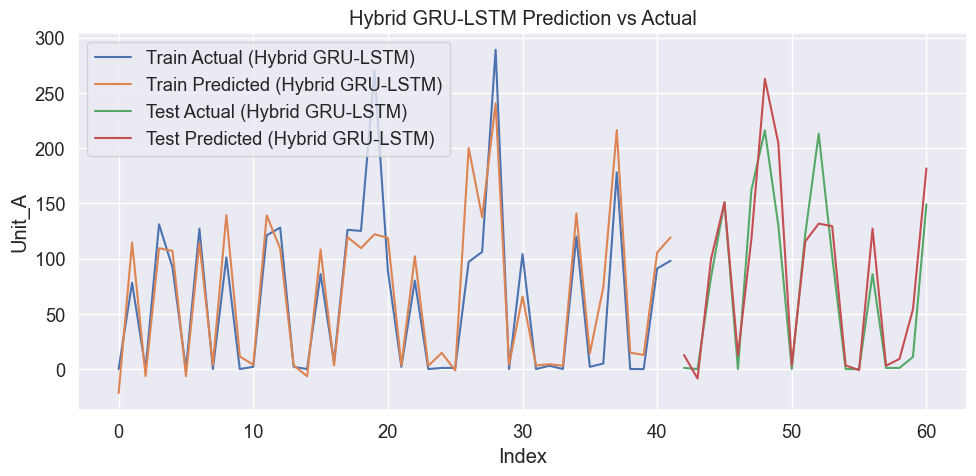

In [ ]:
import numpy as np
np.random.seed(123)

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import GRU, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# Fungsi untuk membangun dan melatih model GRU-LSTM Hybrid dengan Hyperopt
def build_gru_lstm_model(gru_units, lstm_units, dropout, batch_size, epochs):
    model = Sequential()
    # GRU Layer
    model.add(GRU(gru_units, input_shape=(X_train.shape[1], 1), return_sequences=True))
    model.add(Dropout(dropout))
    
    # LSTM Layer
    model.add(LSTM(lstm_units, return_sequences=False))
    model.add(Dropout(dropout))
    
    # Output Layer
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mse')
    
    # Early stopping
    es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
              validation_split=0.2, verbose=0, callbacks=[es])
    
    # Prediksi dan menghitung RMSE
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return rmse

# Pastikan X_train/X_test berdimensi (samples, time_steps, features)
X_train_gru_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # reshape menjadi 3D array
X_test_gru_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))      # reshape menjadi 3D array

# Definisikan ruang pencarian parameter untuk Hyperopt
space = {
    'gru_units': hp.quniform('gru_units', 16, 128, 1),  # Jumlah unit GRU
    'lstm_units': hp.quniform('lstm_units', 16, 128, 1),  # Jumlah unit LSTM
    'dropout': hp.uniform('dropout', 0.1, 0.5),      # Dropout rate
    'batch_size': hp.quniform('batch_size', 8, 32, 1),   # Ukuran batch
    'epochs': hp.quniform('epochs', 30, 100, 1)      # Jumlah epoch
}

# Fungsi tujuan untuk optimasi
def objective(params):
    gru_units = int(params['gru_units'])
    lstm_units = int(params['lstm_units'])
    dropout = params['dropout']
    batch_size = int(params['batch_size'])
    epochs = int(params['epochs'])
    
    return {'loss': build_gru_lstm_model(gru_units, lstm_units, dropout, batch_size, epochs),
            'status': STATUS_OK}

# Setup Hyperopt Trials
trials = Trials()

# Melakukan optimasi menggunakan Hyperopt dan algoritma TPE
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=8,  # Jumlah iterasi yang dilakukan
            trials=trials)

# Menampilkan parameter terbaik
best_params = best
print(f"Best GRU-LSTM params (Hyperopt): {best_params}")

# Train model Hybrid GRU-LSTM dengan parameter terbaik
gru_units_gru_lstm = int(best_params['gru_units'])
lstm_units_gru_lstm = int(best_params['lstm_units'])
dropout_gru_lstm = best_params['dropout']
batch_size_gru_lstm = int(best_params['batch_size'])
epochs_gru_lstm = int(best_params['epochs'])

# Train the final GRU-LSTM Hybrid model with the best parameters
model_gru_lstm = Sequential()
model_gru_lstm.add(GRU(gru_units_gru_lstm, input_shape=(X_train_gru_lstm.shape[1], 1), return_sequences=True))
model_gru_lstm.add(Dropout(dropout_gru_lstm))
model_gru_lstm.add(LSTM(lstm_units_gru_lstm, return_sequences=False))
model_gru_lstm.add(Dropout(dropout_gru_lstm))
model_gru_lstm.add(Dense(1))

model_gru_lstm.compile(optimizer='adam', loss='mse')
model_gru_lstm.fit(X_train_gru_lstm, y_train, epochs=epochs_gru_lstm, batch_size=batch_size_gru_lstm,
                   validation_split=0.2, verbose=0)

# Prediksi dan inverse scaling
y_train_pred_gru_lstm = model_gru_lstm.predict(X_train_gru_lstm)
y_test_pred_gru_lstm = model_gru_lstm.predict(X_test_gru_lstm)
y_train_inv_gru_lstm = scaler_y.inverse_transform(y_train)
y_test_inv_gru_lstm = scaler_y.inverse_transform(y_test)
y_train_pred_inv_gru_lstm = scaler_y.inverse_transform(y_train_pred_gru_lstm)
y_test_pred_inv_gru_lstm = scaler_y.inverse_transform(y_test_pred_gru_lstm)

# Hitung RMSE untuk Hybrid GRU-LSTM
rmse_train_gru_lstm = np.sqrt(mean_squared_error(y_train_inv_gru_lstm, y_train_pred_inv_gru_lstm))
rmse_test_gru_lstm = np.sqrt(mean_squared_error(y_test_inv_gru_lstm, y_test_pred_inv_gru_lstm))

print(f"RMSE Train (Hybrid GRU-LSTM): {rmse_train_gru_lstm:.2f}")
print(f"RMSE Test (Hybrid GRU-LSTM): {rmse_test_gru_lstm:.2f}")

# Plot hasil prediksi vs aktual untuk Hybrid GRU-LSTM
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(y_train_inv_gru_lstm)), y_train_inv_gru_lstm, label='Train Actual (Hybrid GRU-LSTM)')
plt.plot(np.arange(len(y_train_inv_gru_lstm)), y_train_pred_inv_gru_lstm, label='Train Predicted (Hybrid GRU-LSTM)')
plt.plot(np.arange(len(y_train_inv_gru_lstm), len(y_train_inv_gru_lstm) + len(y_test_inv_gru_lstm)), y_test_inv_gru_lstm, label='Test Actual (Hybrid GRU-LSTM)')
plt.plot(np.arange(len(y_train_inv_gru_lstm), len(y_train_inv_gru_lstm) + len(y_test_inv_gru_lstm)), y_test_pred_inv_gru_lstm, label='Test Predicted (Hybrid GRU-LSTM)')
plt.xlabel('Index')
plt.ylabel('Unit_A')
plt.title('Hybrid GRU-LSTM Prediction vs Actual')
plt.legend()
plt.tight_layout()
plt.show()


## GRU-TCN

2025-06-08 18:28:29,759 - pyswarms.single.global_best - INFO - Optimize for 8 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/8c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


pyswarms.single.global_best:  12%|█▎        |1/8, best_cost=0.189c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


pyswarms.single.global_best:  25%|██▌       |2/8, best_cost=0.189c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


pyswarms.single.global_best:  38%|███▊      |3/8, best_cost=0.187c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


pyswarms.single.global_best:  50%|█████     |4/8, best_cost=0.187c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


pyswarms.single.global_best:  62%|██████▎   |5/8, best_cost=0.187c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


pyswarms.single.global_best:  75%|███████▌  |6/8, best_cost=0.187c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


pyswarms.single.global_best:  88%|████████▊ |7/8, best_cost=0.187c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


pyswarms.single.global_best: 100%|██████████|8/8, best_cost=0.187
2025-06-08 18:34:19,041 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.18717205445598803, best pos: [78.78591289 75.66711486  5.93551365  0.13155761 22.42791208 52.52620329]


Best GRU-TCN params (PSO): [78.78591289 75.66711486  5.93551365  0.13155761 22.42791208 52.52620329]
Best RMSE GRU-TCN: 0.19


c:\Users\luthf\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
RMSE Train (Hybrid GRU-TCN): 25.57
RMSE Test (Hybrid GRU-TCN): 27.79


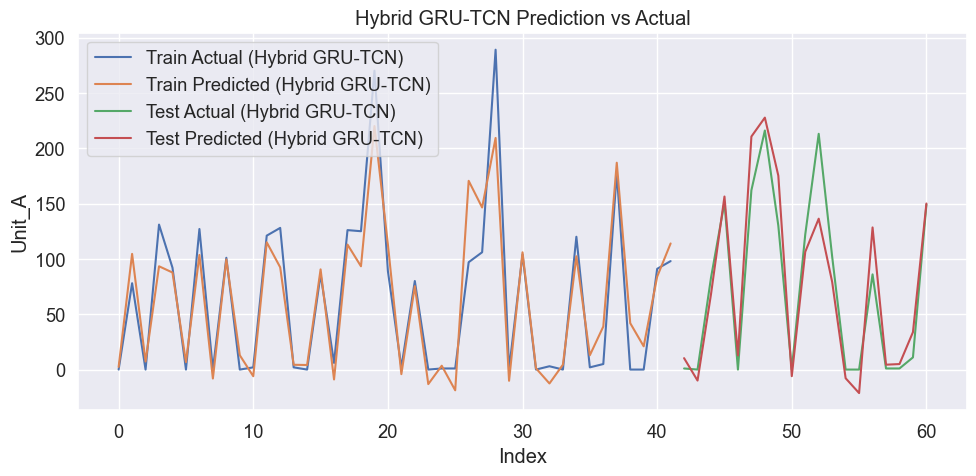

In [ ]:
import numpy as np
np.random.seed(123)

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, Conv1D, Flatten
from keras.callbacks import EarlyStopping
from pyswarms.single.global_best import GlobalBestPSO
from sklearn.metrics import mean_squared_error

# Fungsi untuk membangun dan melatih model GRU-TCN Hybrid dengan PSO
def gru_tcn_objective(params):
    results = []
    for p in params:
        gru_units = int(np.clip(p[0], 16, 128))
        tcn_filters = int(np.clip(p[1], 16, 128))
        kernel_size = int(np.clip(p[2], 2, 8))
        dropout = np.clip(p[3], 0.1, 0.5)
        batch_size = int(np.clip(p[4], 8, 32))
        epochs = int(np.clip(p[5], 30, 100))

        try:
            model = Sequential()
            # GRU Layer
            model.add(GRU(gru_units, input_shape=(X_train.shape[1], 1), return_sequences=True))
            model.add(Dropout(dropout))
            
            # TCN Layer (Conv1D with dilated convolutions)
            model.add(Conv1D(filters=tcn_filters, kernel_size=kernel_size, activation='relu', 
                             dilation_rate=2, padding='causal'))
            model.add(Dropout(dropout))
            
            # Flatten the output to feed into Dense layer
            model.add(Flatten())
            
            # Output Layer
            model.add(Dense(1))
            
            model.compile(optimizer='adam', loss='mse')
            
            # Early stopping
            es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
            model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                      validation_split=0.2, verbose=0, callbacks=[es])
            
            # Prediksi dan menghitung RMSE
            y_pred = model.predict(X_test)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        except Exception:
            rmse = 1e6  # Return a large RMSE if there is an error
        results.append(rmse)
    
    return np.array(results)

# Pastikan X_train/X_test berdimensi (samples, time_steps, features)
X_train_gru_tcn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # reshape menjadi 3D array
X_test_gru_tcn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))      # reshape menjadi 3D array

# Parameter grid untuk PSO
param_grid = {
    'gru_units': [16, 32, 64, 128],
    'tcn_filters': [16, 32, 64, 128],
    'kernel_size': [2, 3, 5, 8],
    'dropout': [0.1, 0.2, 0.3, 0.5],
    'batch_size': [8, 16, 32],
    'epochs': [30, 50, 100]
}

# PSO bounds: [gru_units, tcn_filters, kernel_size, dropout, batch_size, epochs]
bounds = ([16, 16, 2, 0.1, 8, 30], [128, 128, 8, 0.5, 32, 100])
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# Setup PSO
optimizer = GlobalBestPSO(n_particles=8, dimensions=6, options=options, bounds=bounds)

# Melakukan optimasi menggunakan PSO untuk model Hybrid GRU-TCN
best_cost_gru_tcn, best_pos_gru_tcn = optimizer.optimize(gru_tcn_objective, iters=8)

# Print best parameters and cost (RMSE) for GRU-TCN Hybrid
print(f"Best GRU-TCN params (PSO): {best_pos_gru_tcn}")
print(f"Best RMSE GRU-TCN: {best_cost_gru_tcn:.2f}")

# Train model Hybrid GRU-TCN dengan parameter terbaik
gru_units_gru_tcn = int(np.clip(best_pos_gru_tcn[0], 16, 128))
tcn_filters_gru_tcn = int(np.clip(best_pos_gru_tcn[1], 16, 128))
kernel_size_gru_tcn = int(np.clip(best_pos_gru_tcn[2], 2, 8))
dropout_gru_tcn = np.clip(best_pos_gru_tcn[3], 0.1, 0.5)
batch_size_gru_tcn = int(np.clip(best_pos_gru_tcn[4], 8, 32))
epochs_gru_tcn = int(np.clip(best_pos_gru_tcn[5], 30, 100))

# Train the final GRU-TCN Hybrid model with the best parameters
model_gru_tcn = Sequential()
model_gru_tcn.add(GRU(gru_units_gru_tcn, input_shape=(X_train_gru_tcn.shape[1], 1), return_sequences=True))
model_gru_tcn.add(Dropout(dropout_gru_tcn))
model_gru_tcn.add(Conv1D(filters=tcn_filters_gru_tcn, kernel_size=kernel_size_gru_tcn, activation='relu', 
                         dilation_rate=2, padding='causal'))
model_gru_tcn.add(Dropout(dropout_gru_tcn))
model_gru_tcn.add(Flatten())
model_gru_tcn.add(Dense(1))

model_gru_tcn.compile(optimizer='adam', loss='mse')
model_gru_tcn.fit(X_train_gru_tcn, y_train, epochs=epochs_gru_tcn, batch_size=batch_size_gru_tcn,
                  validation_split=0.2, verbose=0)

# Prediksi dan inverse scaling
y_train_pred_gru_tcn = model_gru_tcn.predict(X_train_gru_tcn)
y_test_pred_gru_tcn = model_gru_tcn.predict(X_test_gru_tcn)
y_train_inv_gru_tcn = scaler_y.inverse_transform(y_train)
y_test_inv_gru_tcn = scaler_y.inverse_transform(y_test)
y_train_pred_inv_gru_tcn = scaler_y.inverse_transform(y_train_pred_gru_tcn)
y_test_pred_inv_gru_tcn = scaler_y.inverse_transform(y_test_pred_gru_tcn)

# Hitung RMSE untuk Hybrid GRU-TCN
rmse_train_gru_tcn = np.sqrt(mean_squared_error(y_train_inv_gru_tcn, y_train_pred_inv_gru_tcn))
rmse_test_gru_tcn = np.sqrt(mean_squared_error(y_test_inv_gru_tcn, y_test_pred_inv_gru_tcn))

print(f"RMSE Train (Hybrid GRU-TCN): {rmse_train_gru_tcn:.2f}")
print(f"RMSE Test (Hybrid GRU-TCN): {rmse_test_gru_tcn:.2f}")

# Plot hasil prediksi vs aktual untuk Hybrid GRU-TCN
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(y_train_inv_gru_tcn)), y_train_inv_gru_tcn, label='Train Actual (Hybrid GRU-TCN)')
plt.plot(np.arange(len(y_train_inv_gru_tcn)), y_train_pred_inv_gru_tcn, label='Train Predicted (Hybrid GRU-TCN)')
plt.plot(np.arange(len(y_train_inv_gru_tcn), len(y_train_inv_gru_tcn) + len(y_test_inv_gru_tcn)), y_test_inv_gru_tcn, label='Test Actual (Hybrid GRU-TCN)')
plt.plot(np.arange(len(y_train_inv_gru_tcn), len(y_train_inv_gru_tcn) + len(y_test_inv_gru_tcn)), y_test_pred_inv_gru_tcn, label='Test Predicted (Hybrid GRU-TCN)')
plt.xlabel('Index')
plt.ylabel('Unit_A')
plt.title('Hybrid GRU-TCN Prediction vs Actual')
plt.legend()
plt.tight_layout()
plt.show()


## LSTM-TCN

2025-06-21 16:25:08,055 - pyswarms.single.global_best - INFO - Optimize for 8 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/8c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


pyswarms.single.global_best:  12%|█▎        |1/8, best_cost=0.196c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step


pyswarms.single.global_best:  25%|██▌       |2/8, best_cost=0.194c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


pyswarms.single.global_best:  38%|███▊      |3/8, best_cost=0.188c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


pyswarms.single.global_best:  50%|█████     |4/8, best_cost=0.185c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step


pyswarms.single.global_best:  62%|██████▎   |5/8, best_cost=0.185c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


pyswarms.single.global_best:  75%|███████▌  |6/8, best_cost=0.185c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


pyswarms.single.global_best:  88%|████████▊ |7/8, best_cost=0.185c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


pyswarms.single.global_best: 100%|██████████|8/8, best_cost=0.185
2025-06-21 16:34:12,292 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.1849714654080582, best pos: [87.80480249 54.12496198  6.21185995  0.40013172 27.55622174 76.08735273]
c:\Users\Shabrina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Best LSTM-TCN params (PSO): lstm_units=87, tcn_filters=54, kernel_size=6, dropout=0.40013172252463913, batch_size=27, epochs=76
RMSE Train: 32.60
RMSE Test: 23.88


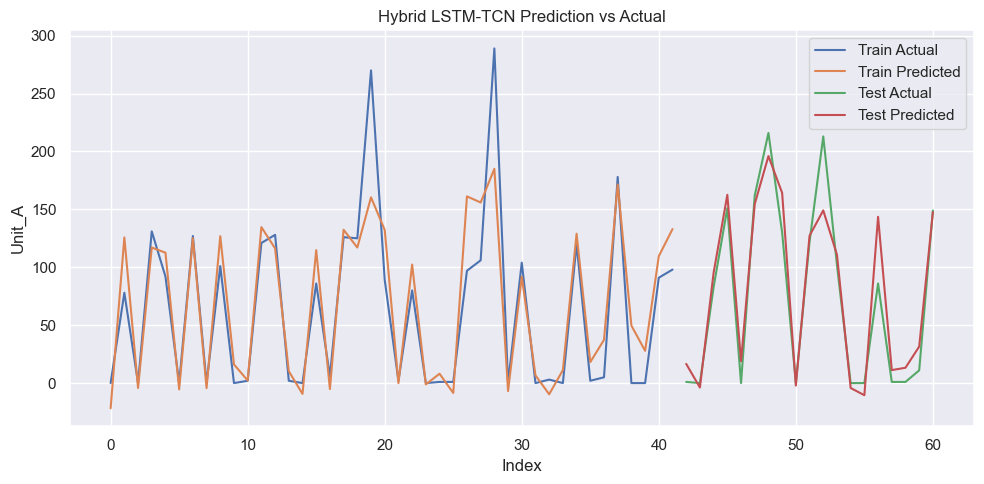

In [61]:
import numpy as np
np.random.seed(123)

import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Conv1D, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping
from pyswarms.single.global_best import GlobalBestPSO
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

# Fungsi objektif untuk PSO: Hybrid LSTM-TCN
def lstm_tcn_objective(params):
    results = []
    for p in params:
        lstm_units = int(np.clip(p[0], 16, 128))
        tcn_filters = int(np.clip(p[1], 16, 128))
        kernel_size = int(np.clip(p[2], 2, 8))
        dropout = np.clip(p[3], 0.1, 0.5)
        batch_size = int(np.clip(p[4], 8, 32))
        epochs = int(np.clip(p[5], 30, 100))
        try:
            model = Sequential()
            model.add(LSTM(lstm_units, input_shape=(X_train.shape[1], 1), return_sequences=True))
            model.add(Dropout(dropout))
            model.add(Conv1D(filters=tcn_filters, kernel_size=kernel_size, activation='relu', 
                             dilation_rate=2, padding='causal'))
            model.add(Dropout(dropout))
            model.add(Flatten())
            model.add(Dense(1))
            model.compile(optimizer='adam', loss='mse')
            es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
            model.fit(X_train_lstm_tcn, y_train, epochs=epochs, batch_size=batch_size,
                      validation_split=0.2, verbose=0, callbacks=[es])
            y_pred = model.predict(X_test_lstm_tcn)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        except Exception:
            rmse = 1e6
        results.append(rmse)
    return np.array(results)

# Siapkan data 3D
X_train_lstm_tcn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm_tcn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# PSO bounds: [lstm_units, tcn_filters, kernel_size, dropout, batch_size, epochs]
bounds = ([16, 16, 2, 0.1, 8, 30], [128, 128, 8, 0.5, 32, 100])
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

optimizer = GlobalBestPSO(n_particles=8, dimensions=6, options=options, bounds=bounds)
best_cost, best_pos = optimizer.optimize(lstm_tcn_objective, iters=8)

# Parameter terbaik
lstm_units = int(np.clip(best_pos[0], 16, 128))
tcn_filters = int(np.clip(best_pos[1], 16, 128))
kernel_size = int(np.clip(best_pos[2], 2, 8))
dropout = np.clip(best_pos[3], 0.1, 0.5)
batch_size = int(np.clip(best_pos[4], 8, 32))
epochs = int(np.clip(best_pos[5], 30, 100))

# Train final model
model = Sequential()
model.add(LSTM(lstm_units, input_shape=(X_train_lstm_tcn.shape[1], 1), return_sequences=True))
model.add(Dropout(dropout))
model.add(Conv1D(filters=tcn_filters, kernel_size=kernel_size, activation='relu', 
                 dilation_rate=2, padding='causal'))
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
model.fit(X_train_lstm_tcn, y_train, epochs=epochs, batch_size=batch_size,
          validation_split=0.2, verbose=0, callbacks=[es])

# Prediksi dan inverse scaling
y_train_pred = model.predict(X_train_lstm_tcn)
y_test_pred = model.predict(X_test_lstm_tcn)
y_train_inv = scaler_y.inverse_transform(y_train)
y_test_inv = scaler_y.inverse_transform(y_test)
y_train_pred_inv = scaler_y.inverse_transform(y_train_pred)
y_test_pred_inv = scaler_y.inverse_transform(y_test_pred)

# Hitung RMSE
rmse_train = np.sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
rmse_test = np.sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))

print(f"Best LSTM-TCN params (PSO): lstm_units={lstm_units}, tcn_filters={tcn_filters}, kernel_size={kernel_size}, dropout={dropout}, batch_size={batch_size}, epochs={epochs}")
print(f"RMSE Train: {rmse_train:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")

# Plot hasil prediksi vs aktual
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(y_train_inv)), y_train_inv, label='Train Actual')
plt.plot(np.arange(len(y_train_inv)), y_train_pred_inv, label='Train Predicted')
plt.plot(np.arange(len(y_train_inv), len(y_train_inv) + len(y_test_inv)), y_test_inv, label='Test Actual')
plt.plot(np.arange(len(y_train_inv), len(y_train_inv) + len(y_test_inv)), y_test_pred_inv, label='Test Predicted')
plt.xlabel('Index')
plt.ylabel('Unit_A')
plt.title('Hybrid LSTM-TCN Prediction vs Actual')
plt.legend()
plt.tight_layout()
plt.show()